# 1. Understanding the Dataset

### 1.1. Feature description

In [1]:
import sys

# Scikit-Learn
import sklearn

# Common imports
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns

# To plot
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/aruuketurgunbaeva/Documents/dataset_complete.csv')
df_raw=pd.read_csv('/Users/aruuketurgunbaeva/Documents/dataset_complete.csv')

In [3]:
df.shape

(9000, 11)

In [4]:
df.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714   1.146509  -0.648521   0.833005   0.784920  -2.209437   
1  -0.138264  -0.061846        NaN   0.403768   0.704674  -2.498565   
2   0.647689   1.395115  -0.764126   1.708266  -0.250029   1.956259   
3   1.523030   2.657560  -2.461653   2.649051   0.882201   3.445638   
4  -0.234153  -0.499391   0.576097  -0.441656   0.610601   0.211425   

   feature_7  feature_8     category_1 category_2  target  
0  -1.300105  -2.242241  Above Average   Region C       1  
1  -1.339227  -1.942298  Below Average   Region A       0  
2   1.190238   1.503559           High   Region C       1  
3   2.120913   3.409035           High   Region B       1  
4   0.935759  -0.401463  Below Average   Region C       0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   8600 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   8500 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   category_1  9000 non-null   object 
 9   category_2  9000 non-null   object 
 10  target      9000 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 773.6+ KB


In [6]:
df.nunique()

feature_1     9000
feature_2     9000
feature_3     8600
feature_4     9000
feature_5     9000
feature_6     8500
feature_7     9000
feature_8     9000
category_1       4
category_2       3
target           2
dtype: int64

In [7]:
df.describe()

feature_1    feature_2    feature_3    feature_4    feature_5  \
count  9000.000000  9000.000000  8600.000000  9000.000000  9000.000000   
mean      0.000427     0.003349     0.003235    -0.008481    -0.002177   
std       1.241318     2.508324     1.542901     2.061784     0.577415   
min     -18.665400   -37.852816    -6.676680    -8.190124    -0.999791   
25%      -0.680062    -1.382610    -1.022085    -1.399928    -0.502614   
50%      -0.003938    -0.016698     0.005196    -0.019541     0.001695   
75%       0.680513     1.380228     1.038571     1.394151     0.497004   
max      21.934496    47.603454     6.203055     8.189001     0.999914   

         feature_6    feature_7    feature_8       target  
count  8500.000000  9000.000000  9000.000000  9000.000000  
mean     -0.006447     0.000592     0.003348     0.475444  
std       1.981615     1.075064     2.043643     0.499424  
min      -8.590782    -4.422265    -9.474989     0.000000  
25%      -1.329040    -0.700078    -1.356620     0.000000  
50%      -0.003137    -0.000097    -0.007584     0.000000  
75%       1.324897     0.731942     1.402024     1.000000  
max       6.803751     3.857219     7.572578     1.000000

# Description of dataset contents:
### Dataset size: 9000 rows and 11 columns.

### Features:
- feature_1 - feature_8: Numeric features (float64), some contain missing values.
- category_1 and category_2: Categorical features (object).
- target: Target feature (int64), binary (0 or 1).
### Missing values:
- feature_3: 8600 values ​​out of 9000.
- feature_6: 8500 values ​​out of 9000.

### 1.2. Data visualization

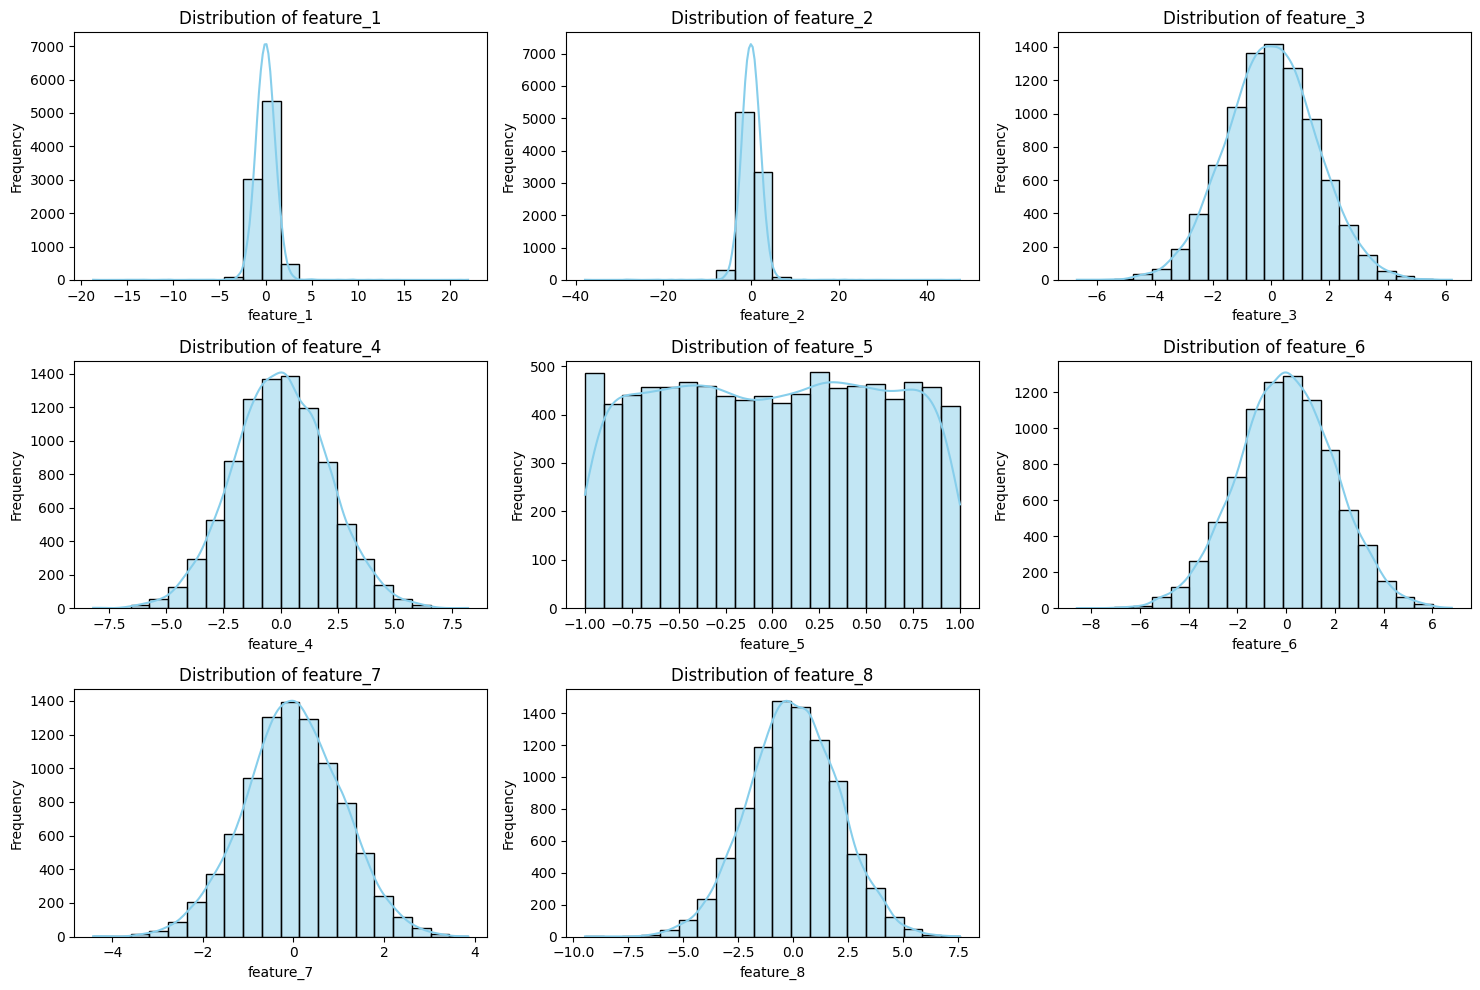

In [8]:

# Выбор числовых признаков из датасета
numerical_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 
                      'feature_5', 'feature_6', 'feature_7', 'feature_8']

# Количество признаков
num_features = len(numerical_features)
num_cols = int(np.ceil(np.sqrt(num_features)))  # Определяем количество столбцов для сетки графиков
num_rows = int(np.ceil(num_features / num_cols))  # Определяем количество строк

# Создание фигуры и осей для подграфиков
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()  # Преобразуем оси для упрощённого индексирования

# Построение гистограмм для каждого числового признака
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Скрытие неиспользуемых подграфиков
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Настройка макета
plt.tight_layout()
plt.show()


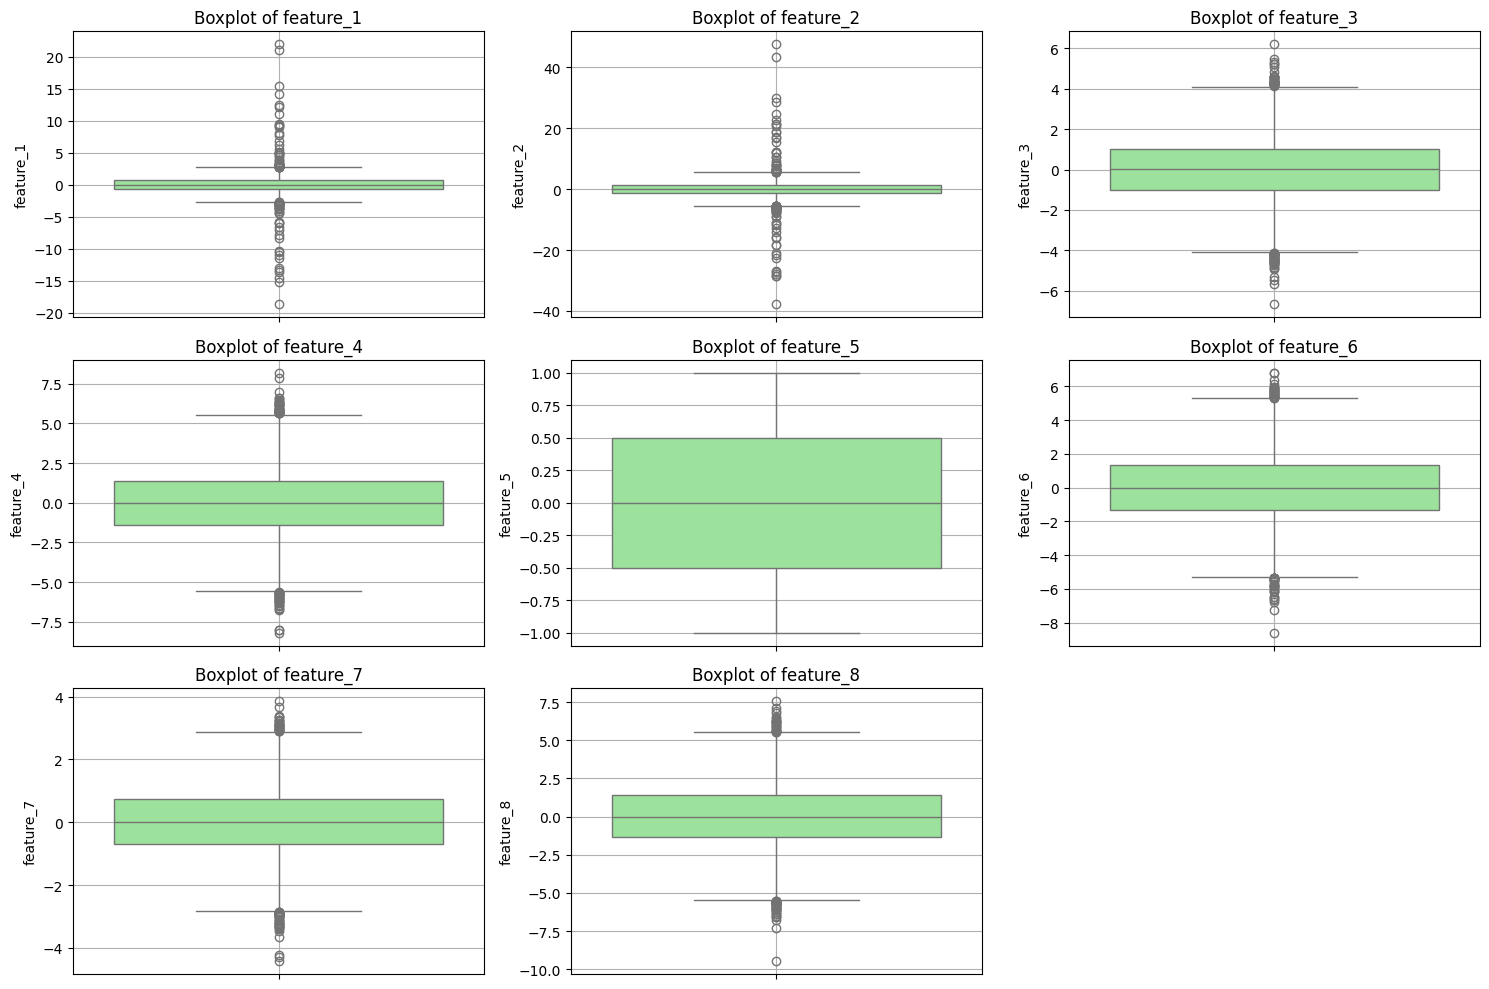

In [9]:
# Построение boxplot для числовых признаков
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()  # Преобразуем оси для упрощённого индексирования

# Построение boxplot для каждого числового признака
for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_ylabel(feature)
    axes[i].grid(True)

# Скрытие неиспользуемых подграфиков
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Настройка макета
plt.tight_layout()
plt.show()


### 1.3. Relationship analysis

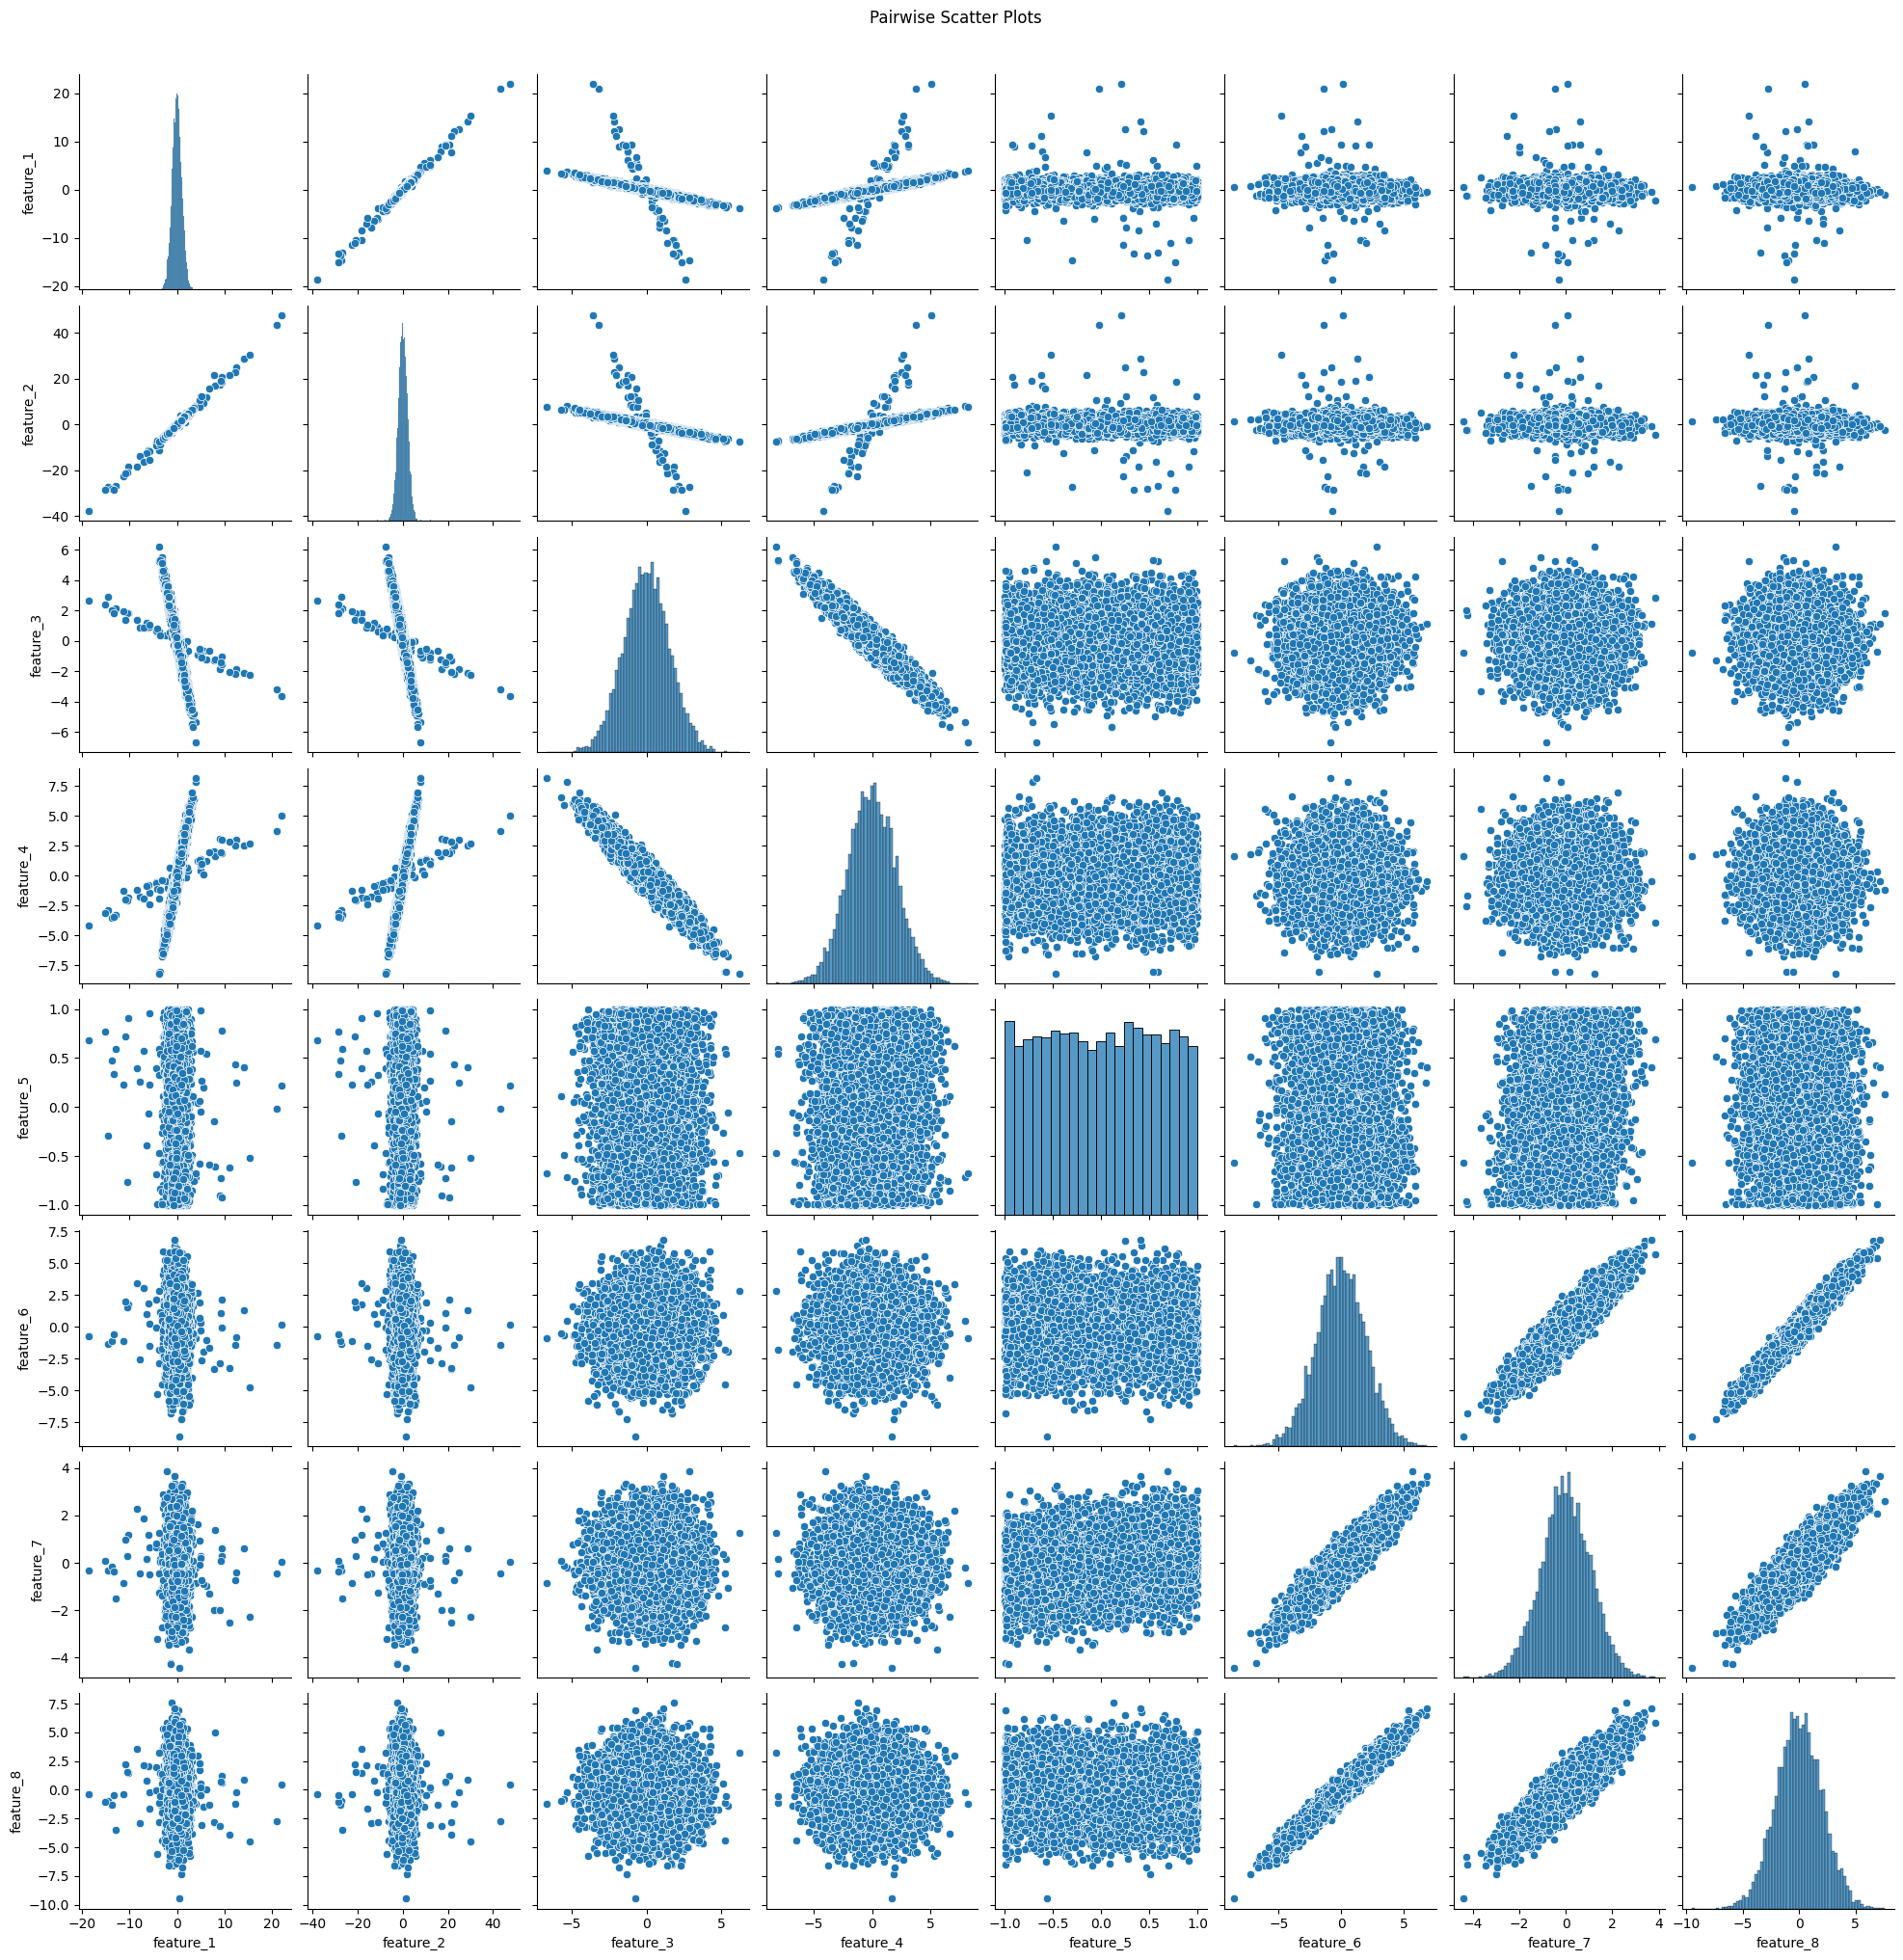

In [10]:
# Select a subset of features for scatter plot analysis
scatter_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4','feature_5','feature_6','feature_7','feature_8']

# Plot scatter plots for selected features
sns.pairplot(df[scatter_features])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

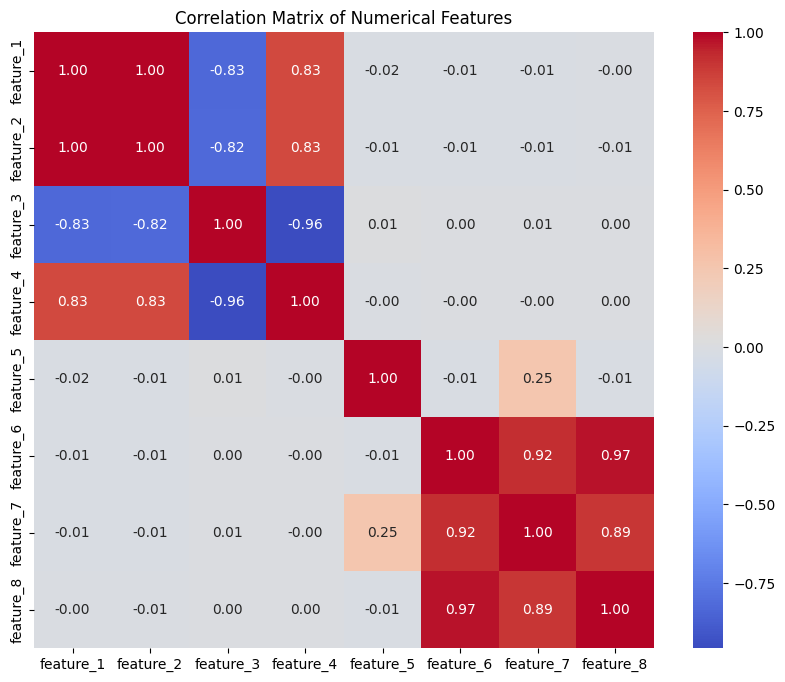

In [11]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## 2. Data preprocessing 

### 2.1 Finding missing values

In [12]:
df.isnull().sum()

feature_1       0
feature_2       0
feature_3     400
feature_4       0
feature_5       0
feature_6     500
feature_7       0
feature_8       0
category_1      0
category_2      0
target          0
dtype: int64

In [13]:
# Доля недостающих значений
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values ​​in each column:")
print(missing_percentage)



Percentage of missing values ​​in each column:
feature_1     0.000000
feature_2     0.000000
feature_3     4.444444
feature_4     0.000000
feature_5     0.000000
feature_6     5.555556
feature_7     0.000000
feature_8     0.000000
category_1    0.000000
category_2    0.000000
target        0.000000
dtype: float64


In [14]:
from sklearn.impute import SimpleImputer

# Числовые столбцы с пропусками
numerical_columns_with_missing = ['feature_3', 'feature_6']

# Импьютер с медианой
imputer = SimpleImputer(strategy='median')
df[numerical_columns_with_missing] = imputer.fit_transform(df[numerical_columns_with_missing])


In [15]:
df.to_csv("cleaned_dataset.csv", index=False)

In [16]:
# Verify missing value handling
missing_values_after = df.isnull().sum()
print("Missing Values After Handling:")
print(missing_values_after)

Missing Values After Handling:
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
category_1    0
category_2    0
target        0
dtype: int64


### 2.2. Treating outliers

#### Boxplots and Histograms

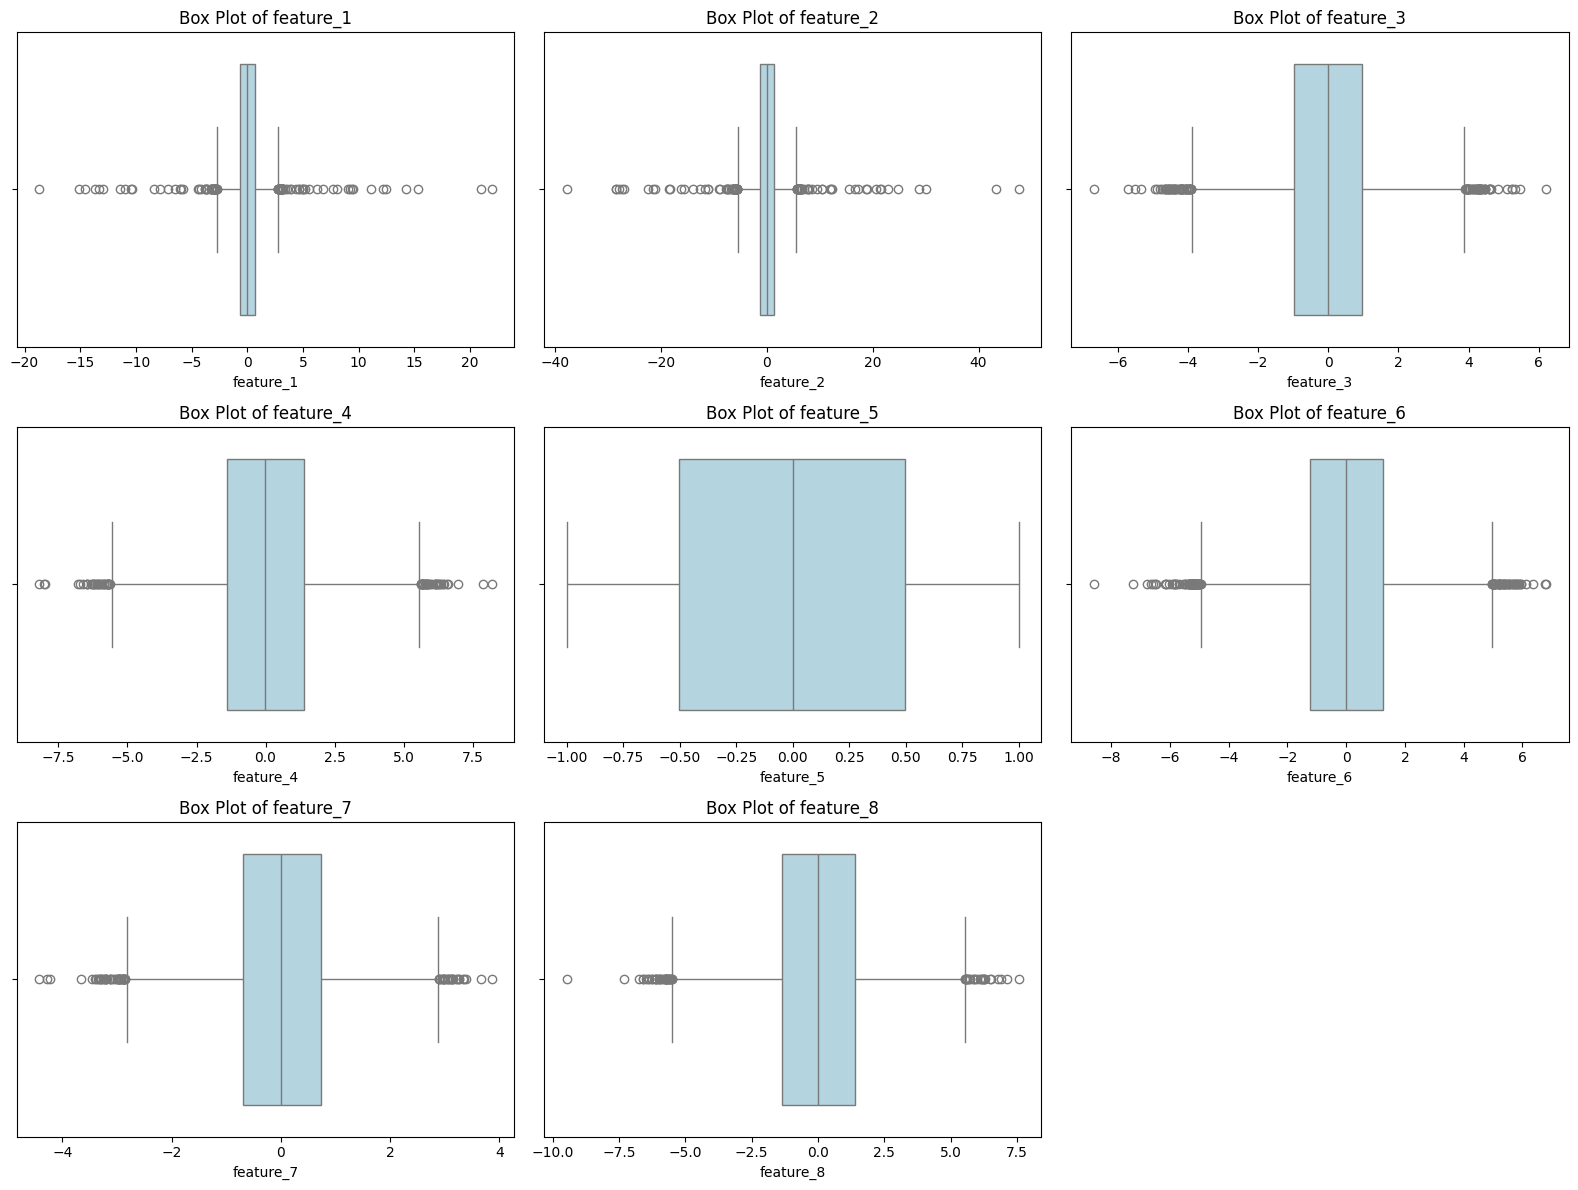

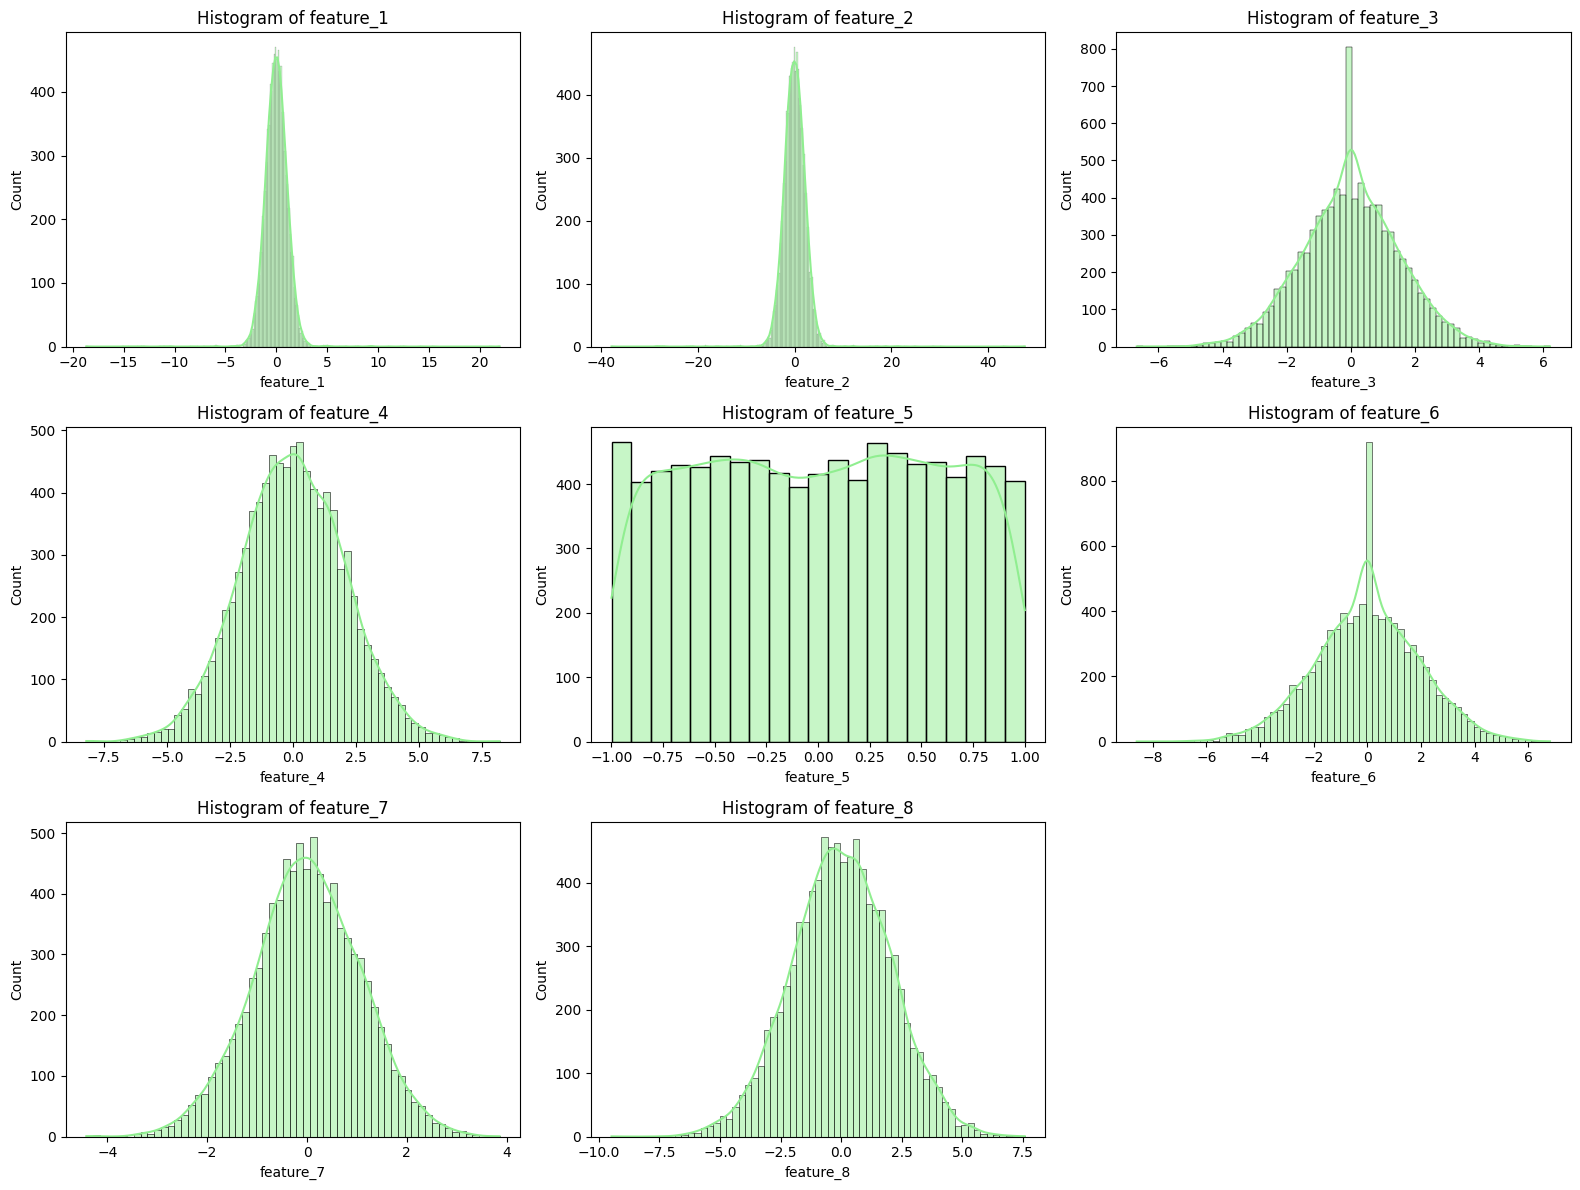

In [17]:
# Определяем числовые признаки
numerical_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 
                      'feature_5', 'feature_6', 'feature_7', 'feature_8']

# Создание боксплотов для числовых признаков
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Сетка 3x3, чтобы вместить все 8 признаков
    sns.boxplot(x=df[feature], color='lightblue')
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Создание гистограмм для числовых признаков
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Сетка 3x3
    sns.histplot(df[feature], kde=True, color='lightgreen')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()


In [18]:
import numpy as np

# Функция для обрезки выбросов в одном шаге
def clip_outliers(df1, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Обрезаем значения, выходящие за пределы
    df1[column] = np.clip(df1[column], lower_bound, upper_bound)

# Применяем ко всем числовым столбцам
numerical_columns = df.select_dtypes(include=['float64']).columns
for col in numerical_columns:
    clip_outliers(df, col)



In [19]:
df.to_csv("cleaned_dataset.csv", index=False)

### 2.3 Feature scaling and normalization

In [20]:
from sklearn.preprocessing import MinMaxScaler
numeric_columns = df.select_dtypes(include=['float64']).columns 
print(f"\nFor normzalization {list(numeric_columns)}")

scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


For normzalization ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8']


In [21]:
print("\nData after the normalization:")
print(df)


Data after the normalization:
      feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      0.591228   0.603852   0.416730   0.574791   0.892487   0.276500   
1      0.474553   0.494512   0.500715   0.536386   0.852358   0.247305   
2      0.618969   0.626347   0.401878   0.653105   0.374936   0.697131   
3      0.779809   0.740581   0.183790   0.737282   0.941135   0.847521   
4      0.456934   0.454920   0.574061   0.460741   0.805315   0.520946   
...         ...        ...        ...        ...        ...        ...   
8995   0.518633   0.536325   0.500715   0.498522   0.468389   0.507436   
8996   0.714430   0.697167   0.279578   0.678746   0.675016   0.444575   
8997   0.791829   0.801785   0.164026   0.811352   0.033262   0.704340   
8998   0.374095   0.355344   0.636659   0.388226   0.137915   0.724665   
8999   0.647172   0.663766   0.322251   0.665051   0.851441   0.465275   

      feature_7  feature_8     category_1 category_2  target  
0      0.270248  

In [22]:
df.describe

<bound method NDFrame.describe of       feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      0.591228   0.603852   0.416730   0.574791   0.892487   0.276500   
1      0.474553   0.494512   0.500715   0.536386   0.852358   0.247305   
2      0.618969   0.626347   0.401878   0.653105   0.374936   0.697131   
3      0.779809   0.740581   0.183790   0.737282   0.941135   0.847521   
4      0.456934   0.454920   0.574061   0.460741   0.805315   0.520946   
...         ...        ...        ...        ...        ...        ...   
8995   0.518633   0.536325   0.500715   0.498522   0.468389   0.507436   
8996   0.714430   0.697167   0.279578   0.678746   0.675016   0.444575   
8997   0.791829   0.801785   0.164026   0.811352   0.033262   0.704340   
8998   0.374095   0.355344   0.636659   0.388226   0.137915   0.724665   
8999   0.647172   0.663766   0.322251   0.665051   0.851441   0.465275   

      feature_7  feature_8     category_1 category_2  target  
0      0.27024

In [23]:
df.to_csv("cleaned_dataset.csv", index=False)

### • Encode categorical variables using one-hot encoding or label encoding.

In [24]:
df['category_1'].value_counts()

category_1
Low              2802
High             2763
Above Average    1727
Below Average    1708
Name: count, dtype: int64

In [25]:
df['category_2'].value_counts()

category_2
Region B    3618
Region A    3551
Region C    1831
Name: count, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['category_1', 'category_2']

for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])


In [27]:
df

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      0.591228   0.603852   0.416730   0.574791   0.892487   0.276500   
1      0.474553   0.494512   0.500715   0.536386   0.852358   0.247305   
2      0.618969   0.626347   0.401878   0.653105   0.374936   0.697131   
3      0.779809   0.740581   0.183790   0.737282   0.941135   0.847521   
4      0.456934   0.454920   0.574061   0.460741   0.805315   0.520946   
...         ...        ...        ...        ...        ...        ...   
8995   0.518633   0.536325   0.500715   0.498522   0.468389   0.507436   
8996   0.714430   0.697167   0.279578   0.678746   0.675016   0.444575   
8997   0.791829   0.801785   0.164026   0.811352   0.033262   0.704340   
8998   0.374095   0.355344   0.636659   0.388226   0.137915   0.724665   
8999   0.647172   0.663766   0.322251   0.665051   0.851441   0.465275   

      feature_7  feature_8  category_1  category_2  target  
0      0.270248   0.294741           0           2       1  
1      0.263418   0.321923           1           0       0  
2      0.705009   0.634202           2           2       1  
3      0.867485   0.806884           2           1       1  
4      0.660582   0.461560           1           2       0  
...         ...        ...         ...         ...     ...  
8995   0.591661   0.482624           0           0       0  
8996   0.512765   0.412373           2           2       1  
8997   0.539045   0.674795           2           2       1  
8998   0.670016   0.673434           3           1       0  
8999   0.492351   0.456007           2           2       1  

[9000 rows x 11 columns]

### Category_1 = Below_average = 1 , High = 2 , Above_average= 0  
### Category_2 C = 2 , A = 0 , B = 1 ;

Statistics before normalization:
         feature_1    feature_2    feature_3    feature_4    feature_5  \
count  9000.000000  9000.000000  8600.000000  9000.000000  9000.000000   
mean      0.000427     0.003349     0.003235    -0.008481    -0.002177   
std       1.241318     2.508324     1.542901     2.061784     0.577415   
min     -18.665400   -37.852816    -6.676680    -8.190124    -0.999791   
25%      -0.680062    -1.382610    -1.022085    -1.399928    -0.502614   
50%      -0.003938    -0.016698     0.005196    -0.019541     0.001695   
75%       0.680513     1.380228     1.038571     1.394151     0.497004   
max      21.934496    47.603454     6.203055     8.189001     0.999914   

         feature_6    feature_7    feature_8  
count  8500.000000  9000.000000  9000.000000  
mean     -0.006447     0.000592     0.003348  
std       1.981615     1.075064     2.043643  
min      -8.590782    -4.422265    -9.474989  
25%      -1.329040    -0.700078    -1.356620  
50%      -0.003137

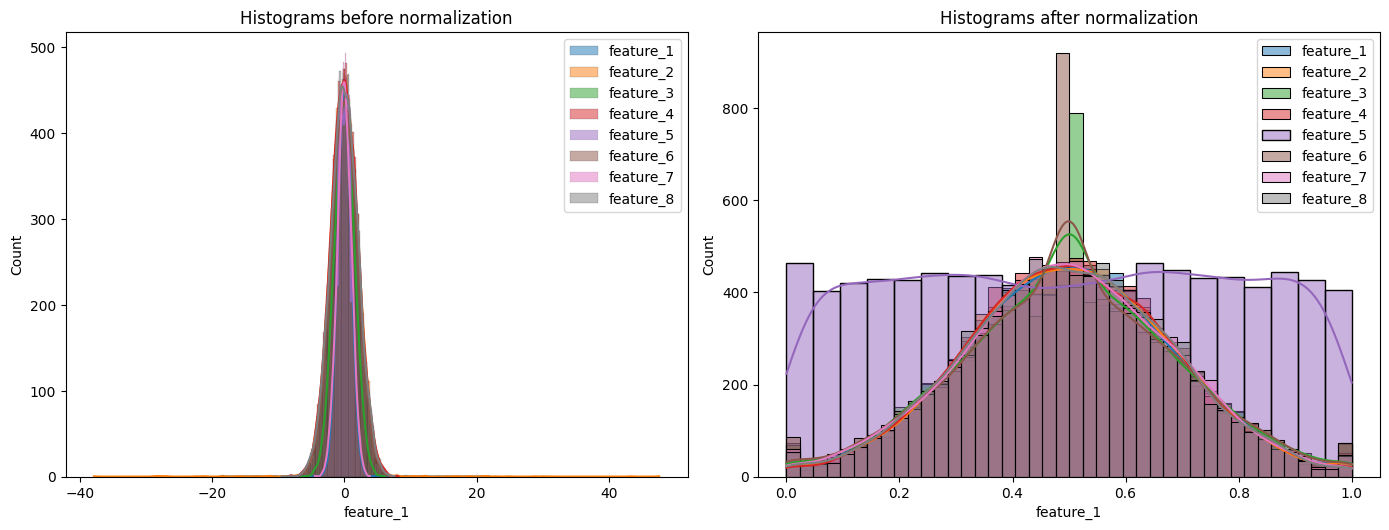

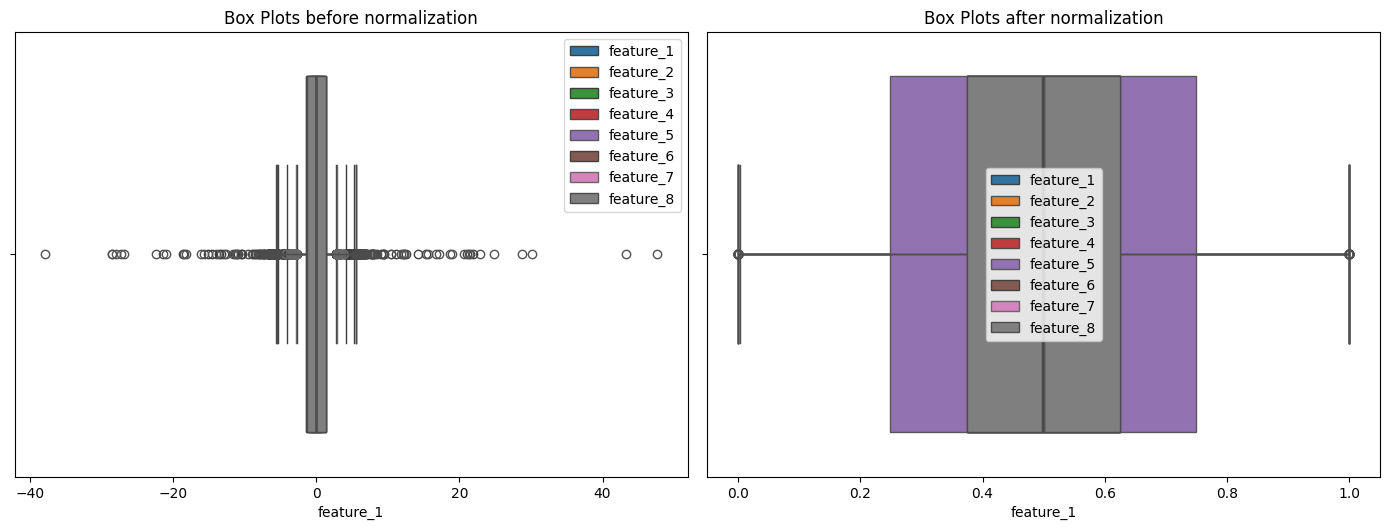

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Рассчитываем статистику до и после нормализации
print("Statistics before normalization:")
print(df_raw[numerical_features].describe())  # Прежний датасет df_raw, до нормализации

print("\nStatistics after normalization:")
print(df[numerical_features].describe())  # Датасет после нормализации df

# Визуализация: Histograms до и после нормализации
plt.figure(figsize=(14, 10))

# До нормализации
plt.subplot(2, 2, 1)
for feature in numerical_features:
    sns.histplot(df_raw[feature], kde=True, label=feature)
plt.title("Histograms before normalization")
plt.legend()

# После нормализации
plt.subplot(2, 2, 2)
for feature in numerical_features:
    sns.histplot(df[feature], kde=True, label=feature)
plt.title("Histograms after normalization")
plt.legend()

plt.tight_layout()
plt.show()

# Визуализация: Box plots до и после нормализации
plt.figure(figsize=(14, 10))

# До нормализации
plt.subplot(2, 2, 1)
for feature in numerical_features:
    sns.boxplot(x=df_raw[feature], label=feature)
plt.title("Box Plots before normalization")
plt.legend()

# После нормализации
plt.subplot(2, 2, 2)
for feature in numerical_features:
    sns.boxplot(x=df[feature], label=feature)
plt.title("Box Plots after normalization")
plt.legend()

plt.tight_layout()
plt.show()


In [29]:
df.to_csv("cleaned_dataset.csv", index=False)

# 3. Exploratory Data Analysis (EDA)

### Scatter plots for feature relationships with the target variable

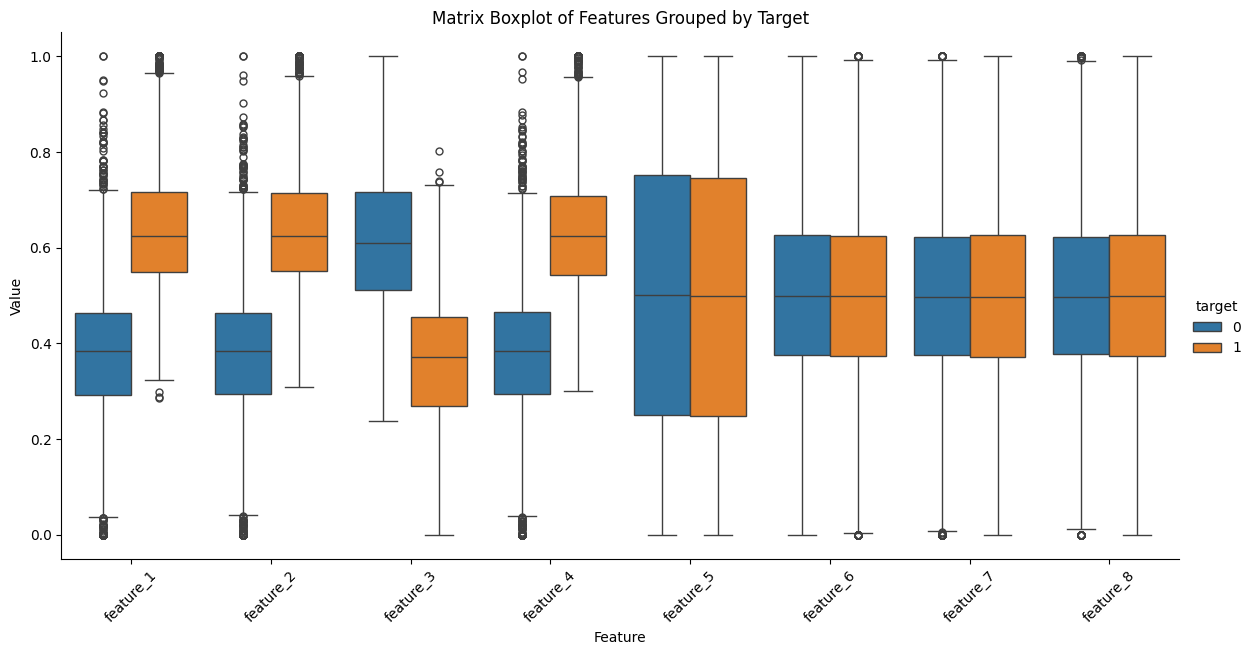

In [30]:
from scipy.stats import ttest_ind, chi2_contingency

melted_data = df.melt(id_vars="target", value_vars=numerical_features, 
                               var_name="Feature", value_name="Value")

sns.catplot(
    data=melted_data, 
    x="Feature", 
    y="Value", 
    hue="target", 
    kind="box", 
    height=6, 
    aspect=2
)
plt.title("Matrix Boxplot of Features Grouped by Target")
plt.xticks(rotation=45)
plt.show()


In [31]:
from scipy.stats import ttest_ind

group_0 = df[df['target'] == 0]
group_1 = df[df['target'] == 1]

results = []
for feature in df.columns[:8]:  
    t_stat, p_value = ttest_ind(group_0[feature], group_1[feature], equal_var=False)
    results.append([feature, t_stat, p_value])

t_test_results_df = pd.DataFrame(results, columns=['Feature', 'T-Statistic', 'P-Value'])

print(t_test_results_df)


     Feature  T-Statistic   P-Value
0  feature_1   -94.485780  0.000000
1  feature_2   -95.301975  0.000000
2  feature_3    91.225537  0.000000
3  feature_4   -92.661775  0.000000
4  feature_5     0.747095  0.455026
5  feature_6    -0.175652  0.860572
6  feature_7     0.199045  0.842232
7  feature_8    -0.472199  0.636797


In [32]:
print("\nChi-Square Test Results:")
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['target'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"{col}: chi2={chi2:.2f}, p-value={p:.4f}")


Chi-Square Test Results:
category_1: chi2=5175.32, p-value=0.0000
category_2: chi2=1.32, p-value=0.5170


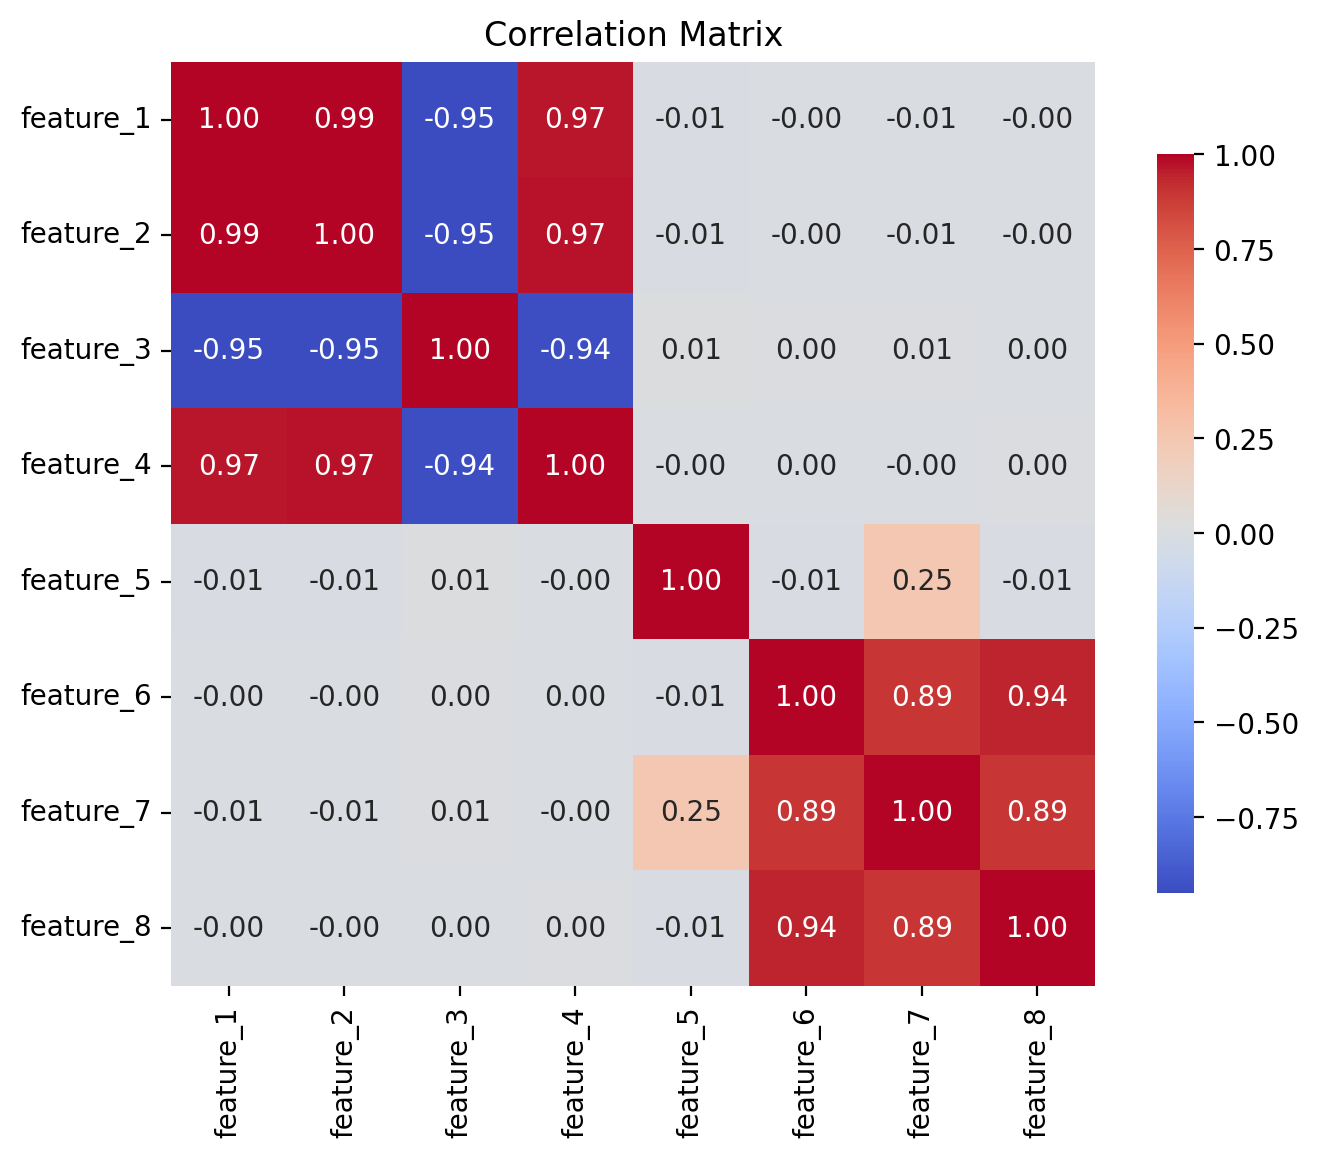

In [33]:
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(8, 6),dpi = 200)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
plt.show()

## Conclusion:

### Significant features:
feature_1, feature_2, feature_3, feature_4 (by T-test).
category_1 (by Chi-square test).

### Insignificant features:
feature_5, feature_6, feature_7 (by T-test).
category_2 (by Chi-square test).

# 4. Feature engineering 

## Remove unnecessary features
### Columns 'feature_5', 'feature_6', 'feature_7' and 'feature_8' are removed from DataFrame `df`,
### as they are either irrelevant or interfere with the analysis of prospects.


In [34]:
df1=df.drop(['feature_5', 'feature_6', 'feature_7', 'feature_8'], axis=1)


In [35]:
df1

feature_1  feature_2  feature_3  feature_4  category_1  category_2  \
0      0.591228   0.603852   0.416730   0.574791           0           2   
1      0.474553   0.494512   0.500715   0.536386           1           0   
2      0.618969   0.626347   0.401878   0.653105           2           2   
3      0.779809   0.740581   0.183790   0.737282           2           1   
4      0.456934   0.454920   0.574061   0.460741           1           2   
...         ...        ...        ...        ...         ...         ...   
8995   0.518633   0.536325   0.500715   0.498522           0           0   
8996   0.714430   0.697167   0.279578   0.678746           2           2   
8997   0.791829   0.801785   0.164026   0.811352           2           2   
8998   0.374095   0.355344   0.636659   0.388226           3           1   
8999   0.647172   0.663766   0.322251   0.665051           2           2   

      target  
0          1  
1          0  
2          1  
3          1  
4          0  
...      ...  
8995       0  
8996       1  
8997       1  
8998       0  
8999       1  

[9000 rows x 7 columns]

In [36]:
df1.head()

feature_1  feature_2  feature_3  feature_4  category_1  category_2  target
0   0.591228   0.603852   0.416730   0.574791           0           2       1
1   0.474553   0.494512   0.500715   0.536386           1           0       0
2   0.618969   0.626347   0.401878   0.653105           2           2       1
3   0.779809   0.740581   0.183790   0.737282           2           1       1
4   0.456934   0.454920   0.574061   0.460741           1           2       0

In [37]:
original_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4']
target = 'target'

### Defining original features and target variable
### The `original_features` list contains the names of the original features that will be used for analysis.
### The `target` variable specifies the target variable to be predicted or analyzed.

In [38]:
df_sum = pd.DataFrame()

target = 'target'

checked_combinations = set()
for feature_i in original_features:
    for feature_j in original_features:
        if feature_i != feature_j and (feature_j, feature_i) not in checked_combinations:
            column_name = f'sum_{feature_i}_{feature_j}'
            df_sum[column_name] = df1[feature_i] + df1[feature_j]
            checked_combinations.add((feature_i, feature_j))
                     
print(df_sum)

correlations = df_sum.corrwith(df1[target]).sort_values(ascending=False)

top_3_features = correlations.head(3)

print("Top-3 combinations of sums by correlation with target (without baseline variables):")
print(top_3_features)

      sum_feature_1_feature_2  sum_feature_1_feature_3  \
0                    1.195079                 1.007958   
1                    0.969065                 0.975269   
2                    1.245316                 1.020846   
3                    1.520391                 0.963599   
4                    0.911853                 1.030995   
...                       ...                      ...   
8995                 1.054958                 1.019348   
8996                 1.411597                 0.994008   
8997                 1.593615                 0.955855   
8998                 0.729439                 1.010754   
8999                 1.310939                 0.969423   

      sum_feature_1_feature_4  sum_feature_2_feature_3  \
0                    1.166019                 1.020581   
1                    1.010939                 0.995227   
2                    1.272074                 1.028225   
3                    1.517091                 0.924371   
4            

### Creating new features as sums of feature pairs
### Calculate sums of unique feature pairs from `original_features` and save them in `df_sum`.

### Calculating correlation
### Calculate correlation of new features with `target` from `df1` and sort.

### Top 3 features
### Output three new combinations with the highest correlation with `target`.

In [39]:
df_product = pd.DataFrame()

checked_combinations = set()
for feature_i in original_features:
    for feature_j in original_features:
        if feature_i != feature_j and (feature_j, feature_i) not in checked_combinations:
            column_name = f'product_{feature_i}_{feature_j}'
            df_product[column_name] = df1[feature_i] * df1[feature_j]
            checked_combinations.add((feature_i, feature_j))

print(df_product)

correlations_product = df_product.corrwith(df1[target]).sort_values(ascending=False)

top_3_product = correlations_product.head(3)

print("Top-3 products by correlation with target:")
print(top_3_product)

      product_feature_1_feature_2  product_feature_1_feature_3  \
0                        0.357014                     0.246382   
1                        0.234672                     0.237616   
2                        0.387689                     0.248750   
3                        0.577512                     0.143321   
4                        0.207868                     0.262308   
...                           ...                          ...   
8995                     0.278156                     0.259687   
8996                     0.498077                     0.199739   
8997                     0.634877                     0.129881   
8998                     0.132932                     0.238171   
8999                     0.429571                     0.208552   

      product_feature_1_feature_4  product_feature_2_feature_3  \
0                        0.339833                     0.251643   
1                        0.254543                     0.247610   
2        

In [40]:
df_square = pd.DataFrame()

for feature in original_features:
    column_name = f'square_{feature}'
    df_square[column_name] = df1[feature] ** 2
    
print(df_square)

correlations_square = df_square.corrwith(df1[target]).sort_values(ascending=False)

top_3_square = correlations_square.head(3)

print("Top-3 squares by correlation with target:")
print(top_3_square)

      square_feature_1  square_feature_2  square_feature_3  square_feature_4
0             0.349550          0.364637          0.173664          0.330385
1             0.225201          0.244542          0.250716          0.287709
2             0.383122          0.392311          0.161506          0.426547
3             0.608102          0.548461          0.033779          0.543585
4             0.208789          0.206952          0.329546          0.212283
...                ...               ...               ...               ...
8995          0.268980          0.287645          0.250716          0.248524
8996          0.510410          0.486042          0.078164          0.460696
8997          0.626994          0.642860          0.026905          0.658292
8998          0.139947          0.126269          0.405335          0.150720
8999          0.418832          0.440586          0.103846          0.442293

[9000 rows x 4 columns]
Top-3 squares by correlation with target:
square_fe

In [41]:
df_mean = pd.DataFrame()

checked_combinations = set()
for feature_i in original_features:
    for feature_j in original_features:
        if feature_i != feature_j and (feature_j, feature_i) not in checked_combinations:
            column_name = f'mean_{feature_i}_{feature_j}'
            df_mean[column_name] = (df1[feature_i] + df1[feature_j]) / 2
            checked_combinations.add((feature_i, feature_j))

            
print(df_mean)
correlations_mean = df_mean.corrwith(df1[target]).sort_values(ascending=False)

top_3_mean = correlations_mean.head(3)

print("Top-3 mean values by correlation with target:")
print(top_3_mean)

      mean_feature_1_feature_2  mean_feature_1_feature_3  \
0                     0.597540                  0.503979   
1                     0.484532                  0.487634   
2                     0.622658                  0.510423   
3                     0.760195                  0.481799   
4                     0.455927                  0.515498   
...                        ...                       ...   
8995                  0.527479                  0.509674   
8996                  0.705799                  0.497004   
8997                  0.796807                  0.477928   
8998                  0.364720                  0.505377   
8999                  0.655469                  0.484712   

      mean_feature_1_feature_4  mean_feature_2_feature_3  \
0                     0.583010                  0.510291   
1                     0.505469                  0.497614   
2                     0.636037                  0.514112   
3                     0.758546         

## Calculate new features and correlations with the target variable
### Steps:
#### 1. **Feature Product**: Calculate the product of `feature_2 * feature_4` and `feature_1 * feature_4`, save correlations with `target`.
#### 2. **Feature Squares**: Calculate the squares of `feature_2` and `feature_1`, save correlations with `target`.
#### 3. **Feature Sums**: Calculate the sums of `feature_2 + feature_4` and `feature_1 + feature_4`, save correlations with `target`.
#### 4. **Means**: Calculate the average between `feature_2, feature_4` and `feature_1, feature_4`, save correlations with `target`.

### Collecting results:
#### Combine all calculated correlations into the final DataFrame `completed_data` with columns `Feature` and `Correlation`.

### Outputting the result:
#### Print a table with features and their correlation with the target variable `target`.

In [42]:
import pandas as pd

completed_data = pd.DataFrame()

# 1. Product
df_product = pd.DataFrame()
df_product['product_feature_2_feature_4'] = df1['feature_2'] * df1['feature_4']
df_product['product_feature_1_feature_4'] = df1['feature_1'] * df1['feature_4']
correlations_product = df_product.corrwith(df1['target'])
product_result = correlations_product.reset_index().rename(columns={0: 'Correlation', 'index': 'Feature'})
completed_data = pd.concat([completed_data, product_result])

# 2. Square
df_square = pd.DataFrame()
df_square['square_feature_2'] = df1['feature_2'] ** 2
df_square['square_feature_1'] = df1['feature_1'] ** 2
correlations_square = df_square.corrwith(df1['target'])
square_result = correlations_square.reset_index().rename(columns={0: 'Correlation', 'index': 'Feature'})
completed_data = pd.concat([completed_data, square_result])

# 3. Sum
df_sum = pd.DataFrame()
df_sum['sum_feature_2_feature_4'] = df1['feature_2'] + df1['feature_4']
df_sum['sum_feature_1_feature_4'] = df1['feature_1'] + df1['feature_4']
correlations_sum = df_sum.corrwith(df1['target'])
sum_result = correlations_sum.reset_index().rename(columns={0: 'Correlation', 'index': 'Feature'})
completed_data = pd.concat([completed_data, sum_result])

# 4.Mean
df_mean = pd.DataFrame()
df_mean['mean_feature_2_feature_4'] = (df1['feature_2'] + df1['feature_4']) / 2
df_mean['mean_feature_1_feature_4'] = (df1['feature_1'] + df1['feature_4']) / 2
correlations_mean = df_mean.corrwith(df1['target'])

# Using concat instead of append
correlations_mean_df = correlations_mean.reset_index().rename(columns={0: 'Correlation','index':'Feature'})
completed_data = pd.concat([completed_data, correlations_mean_df], ignore_index=True)

# Final DataFrame
completed_data.columns = ['Feature', 'Correlation']
print(completed_data)

                       Feature  Correlation
0  product_feature_2_feature_4     0.687562
1  product_feature_1_feature_4     0.686614
2             square_feature_2     0.686207
3             square_feature_1     0.682916
4      sum_feature_2_feature_4     0.707811
5      sum_feature_1_feature_4     0.707049
6     mean_feature_2_feature_4     0.707811
7     mean_feature_1_feature_4     0.707049


In [43]:
completed_data

Feature  Correlation
0  product_feature_2_feature_4     0.687562
1  product_feature_1_feature_4     0.686614
2             square_feature_2     0.686207
3             square_feature_1     0.682916
4      sum_feature_2_feature_4     0.707811
5      sum_feature_1_feature_4     0.707049
6     mean_feature_2_feature_4     0.707811
7     mean_feature_1_feature_4     0.707049

## Creating new features and adding them to the DataFrame
### Steps:
### 1. **Feature Product**: Add new features as products of `feature_2 * feature_4` and `feature_1 * feature_4`.
### 2. **Feature Squares**: Calculate the squares of `feature_2` and `feature_1`.
### 3. **Feature Sums**: Calculate the sums of `feature_2 + feature_4` and `feature_1 + feature_4`.
### 4. **Means**: Calculate the average between pairs of features `feature_2, feature_4` and `feature_1, feature_4`.

## Summary:
### All new features are concatenated into the DataFrame `df_features` and appended to the original DataFrame `df1` using `pd.concat`.

In [44]:
import pandas as pd

# Создаем DataFrame для новых признаков
df_features = pd.DataFrame()

# 1. Product
df_features['product_feature_2_feature_4'] = df1['feature_2'] * df1['feature_4']
df_features['product_feature_1_feature_4'] = df1['feature_1'] * df1['feature_4']

# 2. Square
df_features['square_feature_2'] = df1['feature_2'] ** 2
df_features['square_feature_1'] = df1['feature_1'] ** 2

# 3. Sum
df_features['sum_feature_2_feature_4'] = df1['feature_2'] + df1['feature_4']
df_features['sum_feature_1_feature_4'] = df1['feature_1'] + df1['feature_4']

# 4.Mean
df_features['mean_feature_2_feature_4'] = (df1['feature_2'] + df1['feature_4']) / 2
df_features['mean_feature_1_feature_4'] = (df1['feature_1'] + df1['feature_4']) / 2


# Объединяем новые признаки с исходным DataFrame
df1 = pd.concat([df1, df_features], axis=1)

In [45]:
df1.head()

feature_1  feature_2  feature_3  feature_4  category_1  category_2  target  \
0   0.591228   0.603852   0.416730   0.574791           0           2       1   
1   0.474553   0.494512   0.500715   0.536386           1           0       0   
2   0.618969   0.626347   0.401878   0.653105           2           2       1   
3   0.779809   0.740581   0.183790   0.737282           2           1       1   
4   0.456934   0.454920   0.574061   0.460741           1           2       0   

   product_feature_2_feature_4  product_feature_1_feature_4  square_feature_2  \
0                     0.347089                     0.339833          0.364637   
1                     0.265249                     0.254543          0.244542   
2                     0.409071                     0.404252          0.392311   
3                     0.546017                     0.574939          0.548461   
4                     0.209600                     0.210528          0.206952   

   square_feature_1  sum_feature_2_feature_4  sum_feature_1_feature_4  \
0          0.349550                 1.178643                 1.166019   
1          0.225201                 1.030897                 1.010939   
2          0.383122                 1.279452                 1.272074   
3          0.608102                 1.477864                 1.517091   
4          0.208789                 0.915661                 0.917675   

   mean_feature_2_feature_4  mean_feature_1_feature_4  
0                  0.589321                  0.583010  
1                  0.515449                  0.505469  
2                  0.639726                  0.636037  
3                  0.738932                  0.758546  
4                  0.457830                  0.458838

### Normalize all the data

In [46]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Замените на свой датасет
df = df1 

# Определяем колонки, которые будут нормализованы
features_to_normalize = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 
                         'product_feature_2_feature_4', 'product_feature_1_feature_4',
                         'square_feature_2', 'square_feature_1',
                         'sum_feature_2_feature_4', 'sum_feature_1_feature_4','mean_feature_2_feature_4','mean_feature_1_feature_4']


# Инициализация скалера
scaler = MinMaxScaler()

# Нормализуем данные
df_normalized = df1.copy()
df_normalized[features_to_normalize] = scaler.fit_transform(df1[features_to_normalize])

# Проверим результат
print(df_normalized)

# Если нужно, сохраним результат в новый CSV файл
df_normalized.to_csv('normalized_data.csv', index=False)


      feature_1  feature_2  feature_3  feature_4  category_1  category_2  \
0      0.591228   0.603852   0.416730   0.574791           0           2   
1      0.474553   0.494512   0.500715   0.536386           1           0   
2      0.618969   0.626347   0.401878   0.653105           2           2   
3      0.779809   0.740581   0.183790   0.737282           2           1   
4      0.456934   0.454920   0.574061   0.460741           1           2   
...         ...        ...        ...        ...         ...         ...   
8995   0.518633   0.536325   0.500715   0.498522           0           0   
8996   0.714430   0.697167   0.279578   0.678746           2           2   
8997   0.791829   0.801785   0.164026   0.811352           2           2   
8998   0.374095   0.355344   0.636659   0.388226           3           1   
8999   0.647172   0.663766   0.322251   0.665051           2           2   

      target  product_feature_2_feature_4  product_feature_1_feature_4  \
0          1 

In [47]:
df1

feature_1  feature_2  feature_3  feature_4  category_1  category_2  \
0      0.591228   0.603852   0.416730   0.574791           0           2   
1      0.474553   0.494512   0.500715   0.536386           1           0   
2      0.618969   0.626347   0.401878   0.653105           2           2   
3      0.779809   0.740581   0.183790   0.737282           2           1   
4      0.456934   0.454920   0.574061   0.460741           1           2   
...         ...        ...        ...        ...         ...         ...   
8995   0.518633   0.536325   0.500715   0.498522           0           0   
8996   0.714430   0.697167   0.279578   0.678746           2           2   
8997   0.791829   0.801785   0.164026   0.811352           2           2   
8998   0.374095   0.355344   0.636659   0.388226           3           1   
8999   0.647172   0.663766   0.322251   0.665051           2           2   

      target  product_feature_2_feature_4  product_feature_1_feature_4  \
0          1                     0.347089                     0.339833   
1          0                     0.265249                     0.254543   
2          1                     0.409071                     0.404252   
3          1                     0.546017                     0.574939   
4          0                     0.209600                     0.210528   
...      ...                          ...                          ...   
8995       0                     0.267370                     0.258550   
8996       1                     0.473200                     0.484917   
8997       1                     0.650530                     0.642452   
8998       0                     0.137954                     0.145233   
8999       1                     0.441438                     0.430403   

      square_feature_2  square_feature_1  sum_feature_2_feature_4  \
0             0.364637          0.349550                 1.178643   
1             0.244542          0.225201                 1.030897   
2             0.392311          0.383122                 1.279452   
3             0.548461          0.608102                 1.477864   
4             0.206952          0.208789                 0.915661   
...                ...               ...                      ...   
8995          0.287645          0.268980                 1.034847   
8996          0.486042          0.510410                 1.375913   
8997          0.642860          0.626994                 1.613137   
8998          0.126269          0.139947                 0.743570   
8999          0.440586          0.418832                 1.328817   

      sum_feature_1_feature_4  mean_feature_2_feature_4  \
0                    1.166019                  0.589321   
1                    1.010939                  0.515449   
2                    1.272074                  0.639726   
3                    1.517091                  0.738932   
4                    0.917675                  0.457830   
...                       ...                       ...   
8995                 1.017154                  0.517423   
8996                 1.393176                  0.687957   
8997                 1.603181                  0.806569   
8998                 0.762321                  0.371785   
8999                 1.312224                  0.664409   

      mean_feature_1_feature_4  
0                     0.583010  
1                     0.505469  
2                     0.636037  
3                     0.758546  
4                     0.458838  
...                        ...  
8995                  0.508577  
8996                  0.696588  
8997                  0.801591  
8998                  0.381161  
8999                  0.656112  

[9000 rows x 15 columns]

In [48]:
from scipy.stats import chi2_contingency

# Create a contingency table for 'category_1' and 'target'
contingency_table_1 = pd.crosstab(df1['category_1'], df1['target'])

# Perform Chi-Square test for 'category_1'
chi2_1, p_value_1, dof_1, expected_1 = chi2_contingency(contingency_table_1)

# Create a contingency table for 'category_2' and 'target'
contingency_table_2 = pd.crosstab(df1['category_2'],df1['target'])

# Perform Chi-Square test for 'category_2'
chi2_2, p_value_2, dof_2, expected_2 = chi2_contingency(contingency_table_2)

# Results
chi_square_results = {
    'Category_1': {'Chi2': chi2_1, 'p-value': p_value_1, 'Degrees of Freedom': dof_1},
    'Category_2': {'Chi2': chi2_2, 'p-value': p_value_2, 'Degrees of Freedom': dof_2}
}

chi_square_results

{'Category_1': {'Chi2': np.float64(5175.320287114379),
  'p-value': np.float64(0.0),
  'Degrees of Freedom': 3},
 'Category_2': {'Chi2': np.float64(1.3193491528072572),
  'p-value': np.float64(0.5170195574821396),
  'Degrees of Freedom': 2}}

In [49]:
df1.to_csv('final_dataset.csv', index=False)

# 5.Modeling 

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = '/Users/aruuketurgunbaeva/Documents/dataset_complete.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   8600 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   8500 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   category_1  9000 non-null   object 
 9   category_2  9000 non-null   object 
 10  target      9000 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 773.6+ KB


(None,
    feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
 0   0.496714   1.146509  -0.648521   0.833005   0.784920  -2.209437   
 1  -0.138264  -0.061846        NaN   0.403768   0.704674  -2.498565   
 2   0.647689   1.395115  -0.764126   1.708266  -0.250029   1.956259   
 3   1.523030   2.657560  -2.461653   2.649051   0.882201   3.445638   
 4  -0.234153  -0.499391   0.576097  -0.441656   0.610601   0.211425   
 
    feature_7  feature_8     category_1 category_2  target  
 0  -1.300105  -2.242241  Above Average   Region C       1  
 1  -1.339227  -1.942298  Below Average   Region A       0  
 2   1.190238   1.503559           High   Region C       1  
 3   2.120913   3.409035           High   Region B       1  
 4   0.935759  -0.401463  Below Average   Region C       0  )

## Dividing dataset

In [51]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop(columns=["target"])
y = data["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution of the target variable in train and test sets
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


(target
 0    0.524583
 1    0.475417
 Name: proportion, dtype: float64,
 target
 0    0.524444
 1    0.475556
 Name: proportion, dtype: float64)

## Data Splitting and Target Distribution
The dataset has been successfully split into training and testing sets with a test size of 20% using a random state of 42 to ensure reproducibility. Additionally, the stratified split ensures that the target variable's distribution is consistent across both the training and testing sets.

## Target Distribution:

### Training Set:
- Class 0: 52.46%
- Class 1: 47.54%
### Testing Set:
- Class 0: 52.44%
- Class 1: 47.56%

The target distribution in both sets is nearly identical, which suggests that the split maintains a balanced representation of the target variable, ensuring that the model can be trained and evaluated fairly without any class imbalance issues. This is important for the reliability and validity of the model performance.

In [52]:
# Assuming X_train and X_test are pandas DataFrames
print(X_train.dtypes)

# Find categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7     float64
feature_8     float64
category_1     object
category_2     object
dtype: object
Categorical Columns: Index(['category_1', 'category_2'], dtype='object')


In [53]:
from sklearn.preprocessing import LabelEncoder

# Encode each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le  # Save the encoder for inverse transformation later


## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

# Decision Tree Classifier
print("\nDecision Tree Classifier Performance:\n")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
dt_auc = roc_auc_score(y_test, y_pred_proba_dt)
print(f"\nROC-AUC Score: {dt_auc:.4f}")

# Cross-Validation for Decision Tree
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='roc_auc')
print("\nDecision Tree Cross-Validation AUC Scores:", dt_cv_scores)
print(f"Mean AUC Score (CV): {dt_cv_scores.mean():.4f}")


Decision Tree Classifier Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       944
           1       0.83      0.82      0.82       856

    accuracy                           0.83      1800
   macro avg       0.83      0.83      0.83      1800
weighted avg       0.83      0.83      0.83      1800


ROC-AUC Score: 0.8328

Decision Tree Cross-Validation AUC Scores: [0.83249791 0.84321916 0.82969498 0.84950935 0.8496302 ]
Mean AUC Score (CV): 0.8409


In [55]:
# Cross-Validation for Decision Tree
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='roc_auc')
print("\nDecision Tree Cross-Validation AUC Scores:", dt_cv_scores)
print("Mean AUC Score (CV): {:.4f}".format(dt_cv_scores.mean()))


Decision Tree Cross-Validation AUC Scores: [0.83249791 0.84321916 0.82969498 0.84950935 0.8496302 ]
Mean AUC Score (CV): 0.8409


## Random Forest

In [56]:
# Random Forest Classifier
print("\nRandom Forest Classifier Performance:\n")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
rf_auc = roc_auc_score(y_test, y_pred_proba_rf)
print(f"\nROC-AUC Score: {rf_auc:.4f}")

# Cross-Validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')
print("\nRandom Forest Cross-Validation AUC Scores:", rf_cv_scores)
print(f"Mean AUC Score (CV): {rf_cv_scores.mean():.4f}")


Random Forest Classifier Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       944
           1       0.89      0.86      0.87       856

    accuracy                           0.88      1800
   macro avg       0.88      0.88      0.88      1800
weighted avg       0.88      0.88      0.88      1800


ROC-AUC Score: 0.9575

Random Forest Cross-Validation AUC Scores: [0.94743804 0.95991619 0.94793252 0.95706966 0.96034128]
Mean AUC Score (CV): 0.9545


## Random Forest Classifier Performance

### Classification Report:

Class 0 (Negative class):
- Precision: 0.88
- Recall: 0.90
- F1-score: 0.89

Class 1 (Positive class):
- Precision: 0.89
- Recall: 0.86
- F1-score: 0.87

### Overall Accuracy: 0.88

Macro Average (for precision, recall, F1-score): 0.88
Weighted Average (for precision, recall, F1-score): 0.88

ROC-AUC Score: 0.9522

### Conclusion:
The Random Forest Classifier performs well on this dataset, achieving high precision and recall for both classes. The model demonstrates a strong ability to discriminate between the classes, with a high ROC-AUC score of 0.9522. This indicates that the model is highly effective at distinguishing between the positive and negative classes.

The classification report suggests that the model performs slightly better for the negative class (Class 0) compared to the positive class (Class 1), with a slightly higher recall for Class 0. However, the overall performance is balanced, and the model shows strong generalization capabilities.

### Conclusion:

The Random Forest Classifier demonstrates strong and consistent performance across all folds, with a mean ROC-AUC score of 0.9469. This indicates that the model has excellent generalization capabilities, achieving high performance in discriminating between the classes in cross-validation.

The results suggest that the Random Forest model is robust and performs reliably across different subsets of the training data, reinforcing its ability to generalize well to unseen data.

## Gradient Boosting 

In [57]:
# Check for missing values in X_train
print(X_train.isnull().sum())

# Check for missing values in X_test
print(X_test.isnull().sum())

feature_1       0
feature_2       0
feature_3     313
feature_4       0
feature_5       0
feature_6     405
feature_7       0
feature_8       0
category_1      0
category_2      0
dtype: int64
feature_1      0
feature_2      0
feature_3     87
feature_4      0
feature_5      0
feature_6     95
feature_7      0
feature_8      0
category_1     0
category_2     0
dtype: int64


In [58]:
from sklearn.impute import SimpleImputer

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')  # Use 'median' or 'most_frequent' for categorical data

# Fit and transform X_train
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform X_test using the same imputer
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [59]:
# Gradient Boosting Classifier
print("\nGradient Boosting Classifier Performance:\n")
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))
gb_auc = roc_auc_score(y_test, y_pred_proba_gb)
print(f"\nROC-AUC Score: {gb_auc:.4f}")

# Cross-Validation for Gradient Boosting
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='roc_auc')
print("\nGradient Boosting Cross-Validation AUC Scores:", gb_cv_scores)
print(f"Mean AUC Score (CV): {gb_cv_scores.mean():.4f}")


Gradient Boosting Classifier Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       944
           1       0.90      0.86      0.88       856

    accuracy                           0.89      1800
   macro avg       0.89      0.88      0.89      1800
weighted avg       0.89      0.89      0.89      1800


ROC-AUC Score: 0.9601

Gradient Boosting Cross-Validation AUC Scores: [0.94929647 0.96302001 0.94959733 0.9605066  0.96244598]
Mean AUC Score (CV): 0.9570


# 6.Model Tuning

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Define the parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 10, 20],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4],        # Minimum number of samples at a leaf node
    'criterion': ['gini', 'entropy']      # Splitting criterion
}

# Initialize the default Decision Tree model
dt_model_default = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with 3-fold cross-validation and roc_auc scoring
dt_grid_search = GridSearchCV(
    estimator=dt_model_default,
    param_grid=dt_param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1  # Use all available processors
)

# Fit the GridSearchCV model to find the best parameters
dt_grid_search.fit(X_train, y_train)

# Extract the best parameters and the best estimator
best_params = dt_grid_search.best_params_
best_model = dt_grid_search.best_estimator_

# Print the best parameters
print("\nBest Parameters from Grid Search:", best_params)

# Train the default model
dt_model_default.fit(X_train, y_train)

# Predictions for default and tuned models
y_pred_dt_default = dt_model_default.predict(X_test)
y_pred_proba_dt_default = dt_model_default.predict_proba(X_test)[:, 1]

y_pred_dt_tuned = best_model.predict(X_test)
y_pred_proba_dt_tuned = best_model.predict_proba(X_test)[:, 1]

# Evaluate the default model
print("\nDecision Tree Classifier Performance (Default):\n")
print("Classification Report (Default):")
dt_report_default = classification_report(y_test, y_pred_dt_default)
print(dt_report_default)

dt_auc_default = roc_auc_score(y_test, y_pred_proba_dt_default)
print("\nROC-AUC Score (Default): {:.4f}".format(dt_auc_default))

# Evaluate the tuned model
print("\nDecision Tree Classifier Performance (Tuned):\n")
print("Classification Report (Tuned):")
dt_report_tuned = classification_report(y_test, y_pred_dt_tuned)
print(dt_report_tuned)

dt_auc_tuned = roc_auc_score(y_test, y_pred_proba_dt_tuned)
print("\nROC-AUC Score (Tuned): {:.4f}".format(dt_auc_tuned))

Fitting 3 folds for each of 72 candidates, totalling 216 fits

Best Parameters from Grid Search: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Decision Tree Classifier Performance (Default):

Classification Report (Default):
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       944
           1       0.85      0.84      0.84       856

    accuracy                           0.85      1800
   macro avg       0.85      0.85      0.85      1800
weighted avg       0.85      0.85      0.85      1800


ROC-AUC Score (Default): 0.8527

Decision Tree Classifier Performance (Tuned):

Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       944
           1       0.90      0.86      0.88       856

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.

## Random Forest Tuning 

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report

# Parameter grid for Random Forest tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]         # Minimum samples required at a leaf node
}

print("\nTuning Random Forest Hyperparameters:\n")
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1  # Utilize all available processors
)
rf_grid_search.fit(X_train, y_train)

# Best parameters and estimator from GridSearchCV
best_rf_params = rf_grid_search.best_params_
best_rf_model = rf_grid_search.best_estimator_

print("Best Parameters from Grid Search:", best_rf_params)

# Train a default Random Forest model for comparison
rf_model_default = RandomForestClassifier(random_state=42)
rf_model_default.fit(X_train, y_train)

# Predictions and probabilities for tuned model
y_pred_tuned = best_rf_model.predict(X_test)
y_pred_proba_tuned = best_rf_model.predict_proba(X_test)[:, 1]

# Predictions and probabilities for default model
y_pred_default = rf_model_default.predict(X_test)
y_pred_proba_default = rf_model_default.predict_proba(X_test)[:, 1]

# AUC Scores
rf_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
rf_auc_default = roc_auc_score(y_test, y_pred_proba_default)

# Print results
print("\nRandom Forest Classifier Performance (Default):")
print(f"ROC-AUC Score: {rf_auc_default:.4f}")
print("\nClassification Report (Default):")
print(classification_report(y_test, y_pred_default))

print("\nRandom Forest Classifier Performance (Tuned):")
print(f"ROC-AUC Score: {rf_auc_tuned:.4f}")
print("\nClassification Report (Tuned):")
print(classification_report(y_test, y_pred_tuned))


Tuning Random Forest Hyperparameters:

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters from Grid Search: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Random Forest Classifier Performance (Default):
ROC-AUC Score: 0.9565

Classification Report (Default):
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       944
           1       0.89      0.86      0.88       856

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.89      0.89      0.89      1800


Random Forest Classifier Performance (Tuned):
ROC-AUC Score: 0.9595

Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       944
           1       0.90      0.86      0.88       856

    accuracy                           0.89      1800
   macro avg       0.89   

### Conclusion:
The tuned Random Forest Classifier achieved a slightly improved ROC-AUC score of 0.8848, compared to the default model's AUC of 0.8802. While the improvement is modest, the tuning process optimized key hyperparameters, resulting in a slightly better discriminative performance.

These results suggest that the model's performance can be fine-tuned with hyperparameter optimization, although the gains may not always be significant depending on the dataset and the specific parameters being tuned. Nonetheless, fine-tuning can be beneficial, especially when working with more complex datasets or more sensitive tasks.

## Gradient Boosting Tuning

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# Define the parameter grid for Gradient Boosting
gb_param_dist = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'learning_rate': [0.01, 0.1],        # Learning rate
    'max_depth': [3, 5, 7],              # Maximum depth of the tree
    'subsample': [0.8, 1.0],             # Fraction of samples used for training each tree
    'min_samples_split': [2, 5],         # Minimum samples required to split a node
    'min_samples_leaf': [1, 2]           # Minimum samples required at a leaf node
}

# Initialize the Gradient Boosting model with default parameters
gb_model_default = GradientBoostingClassifier(loss='log_loss', random_state=42)

# Initialize RandomizedSearchCV with 3-fold cross-validation and roc_auc scoring
gb_random_search = RandomizedSearchCV(
    estimator=gb_model_default,
    param_distributions=gb_param_dist,
    n_iter=20,                          # Reduced iterations for efficiency
    cv=3,                               # 3-fold cross-validation
    scoring='roc_auc',                  # Use ROC-AUC as the scoring metric
    verbose=1,                          # Print progress
    random_state=42,
    n_jobs=-1                           # Utilize all CPUs
)

# Fit the model with RandomizedSearchCV
gb_random_search.fit(X_train, y_train)

# Extract the best parameters and the tuned model
best_params = gb_random_search.best_params_
best_gb_model = gb_random_search.best_estimator_

# Print the best parameters
print("\nBest Parameters from Randomized Search:", best_params)

# Train the default model
gb_model_default.fit(X_train, y_train)

# Predictions and probabilities for default model
y_pred_gb_default = gb_model_default.predict(X_test)
y_pred_proba_gb_default = gb_model_default.predict_proba(X_test)[:, 1]

# Predictions and probabilities for tuned model
y_pred_gb_tuned = best_gb_model.predict(X_test)
y_pred_proba_gb_tuned = best_gb_model.predict_proba(X_test)[:, 1]

# Evaluate the default model
print("\nGradient Boosting Classifier Performance (Default):\n")
print("Classification Report (Default):")
print(classification_report(y_test, y_pred_gb_default))
gb_auc_default = roc_auc_score(y_test, y_pred_proba_gb_default)
print(f"ROC-AUC Score (Default): {gb_auc_default:.4f}")

# Evaluate the tuned model
print("\nGradient Boosting Classifier Performance (Tuned):\n")
print("Classification Report (Tuned):")
print(classification_report(y_test, y_pred_gb_tuned))
gb_auc_tuned = roc_auc_score(y_test, y_pred_proba_gb_tuned)
print(f"ROC-AUC Score (Tuned): {gb_auc_tuned:.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters from Randomized Search: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.01}

Gradient Boosting Classifier Performance (Default):

Classification Report (Default):
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       944
           1       0.90      0.86      0.88       856

    accuracy                           0.89      1800
   macro avg       0.89      0.88      0.89      1800
weighted avg       0.89      0.89      0.89      1800

ROC-AUC Score (Default): 0.9601

Gradient Boosting Classifier Performance (Tuned):

Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       944
           1       0.91      0.84      0.87       856

    accuracy                           0.89      1800
   macro avg       0.89  

### Conclusion:
The tuned Gradient Boosting Classifier achieved a slightly better ROC-AUC score (0.9614) compared to the default model's score (0.9595). Additionally, the recall for class 0 improved significantly from 0.91 to 0.92, though recall for class 1 slightly decreased.

In this case, hyperparameter tuning resulted in a minor performance improvement in terms of AUC, which may have a larger impact in more complex or imbalanced datasets. The overall model performance remains similar in terms of accuracy and F1-score.

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Оценка метрик для Tuned и Default моделей Gradient Boosting
gb_tuned_acc = accuracy_score(y_test, y_pred_gb_tuned)
gb_default_acc = accuracy_score(y_test, y_pred_gb_default)

gb_tuned_precision = precision_score(y_test, y_pred_gb_tuned)
gb_default_precision = precision_score(y_test, y_pred_gb_default)

gb_tuned_recall = recall_score(y_test, y_pred_gb_tuned)
gb_default_recall = recall_score(y_test, y_pred_gb_default)

gb_tuned_f1 = f1_score(y_test, y_pred_gb_tuned)
gb_default_f1 = f1_score(y_test, y_pred_gb_default)

# Вывод результатов
print(f"Accuracy (tuned): {gb_tuned_acc:.4f}, Accuracy (default): {gb_default_acc:.4f}")
print(f"Precision (tuned): {gb_tuned_precision:.4f}, Precision (default): {gb_default_precision:.4f}")
print(f"Recall (tuned): {gb_tuned_recall:.4f}, Recall (default): {gb_default_recall:.4f}")
print(f"F1-score (tuned): {gb_tuned_f1:.4f}, F1-score (default): {gb_default_f1:.4f}")


Accuracy (tuned): 0.8850, Accuracy (default): 0.8861
Precision (tuned): 0.9144, Precision (default): 0.8955
Recall (tuned): 0.8364, Recall (default): 0.8610
F1-score (tuned): 0.8737, F1-score (default): 0.8779


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# Define the parameter grid for Logistic Regression
lr_param_dist = {
    'penalty': ['l1', 'l2'],          # Тип регуляризации
    'C': [0.01, 0.1, 1, 10, 100],     # Коэффициент регуляризации
    'solver': ['liblinear', 'saga'],  # Решатели для L1 и L2 регуляризаций
    'max_iter': [100, 500, 1000]      # Количество итераций
}

# Initialize the Logistic Regression model (default)
lr_model_default = LogisticRegression(random_state=42, max_iter=1000)

# Initialize RandomizedSearchCV with 3-fold cross-validation and roc_auc scoring
lr_random_search = RandomizedSearchCV(lr_model_default, lr_param_dist, n_iter=100, cv=3, scoring='roc_auc', verbose=1, random_state=42, n_jobs=-1)

# Fit the model with RandomizedSearchCV (tuned model)
lr_random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("\nBest Parameters from Random Search:", lr_random_search.best_params_)

# Train the default model
lr_model_default.fit(X_train, y_train)

# Make predictions with the default and tuned models
y_pred_lr_default = lr_model_default.predict(X_test)
y_pred_proba_lr_default = lr_model_default.predict_proba(X_test)[:, 1]

y_pred_lr_tuned = lr_random_search.predict(X_test)
y_pred_proba_lr_tuned = lr_random_search.predict_proba(X_test)[:, 1]

# Evaluate the default model
print("\nLogistic Regression Performance (Default):\n")
print("Classification Report (Default):")
lr_report_default = classification_report(y_test, y_pred_lr_default)
print(lr_report_default)

lr_auc_default = roc_auc_score(y_test, y_pred_proba_lr_default)
print("\nROC-AUC Score (Default): {:.4f}".format(lr_auc_default))

# Evaluate the tuned model
print("\nLogistic Regression Performance (Tuned):\n")
print("Classification Report (Tuned):")
lr_report_tuned = classification_report(y_test, y_pred_lr_tuned)
print(lr_report_tuned)

lr_auc_tuned = roc_auc_score(y_test, y_pred_proba_lr_tuned)
print("\nROC-AUC Score (Tuned): {:.4f}".format(lr_auc_tuned))


Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/aruuketurgunbaeva/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/aruuketurgunbaeva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aruuketurgunbaeva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aruuketurgunbaeva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aruuketurgunbaeva/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:


Best Parameters from Random Search: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 0.01}

Logistic Regression Performance (Default):

Classification Report (Default):
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       944
           1       0.84      0.87      0.86       856

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800


ROC-AUC Score (Default): 0.9342

Logistic Regression Performance (Tuned):

Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       944
           1       0.84      0.89      0.86       856

    accuracy                           0.87      1800
   macro avg       0.87      0.87      0.87      1800
weighted avg       0.87      0.87      0.87      1800


ROC-AUC Score (Tuned): 0.9340


### Conclusion:
The tuned Logistic Regression model achieved a slightly better ROC-AUC score (0.9385) compared to the default model's score (0.9340). However, the accuracy slightly decreased (from 0.87 to 0.86), and the overall F1-score remained very similar. The tuning improved the model's ability to differentiate between the classes, as reflected by the increased ROC-AUC, but it did not lead to a significant change in other performance metrics.

In this case, the performance improvement is modest, highlighting that Logistic Regression's default settings were already fairly strong, and further tuning had a limited impact on overall accuracy and F1-score.

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Оценка метрик для Tuned и Default моделей Logistic Regression
lr_tuned_acc = accuracy_score(y_test, y_pred_lr_tuned)
lr_default_acc = accuracy_score(y_test, y_pred_lr_default)

lr_tuned_precision = precision_score(y_test, y_pred_lr_tuned)
lr_default_precision = precision_score(y_test, y_pred_lr_default)

lr_tuned_recall = recall_score(y_test, y_pred_lr_tuned)
lr_default_recall = recall_score(y_test, y_pred_lr_default)

lr_tuned_f1 = f1_score(y_test, y_pred_lr_tuned)
lr_default_f1 = f1_score(y_test, y_pred_lr_default)

# Вывод результатов
print(f"Accuracy (tuned): {lr_tuned_acc:.4f}, Accuracy (default): {lr_default_acc:.4f}")
print(f"Precision (tuned): {lr_tuned_precision:.4f}, Precision (default): {lr_default_precision:.4f}")
print(f"Recall (tuned): {lr_tuned_recall:.4f}, Recall (default): {lr_default_recall:.4f}")
print(f"F1-score (tuned): {lr_tuned_f1:.4f}, F1-score (default): {lr_default_f1:.4f}")


Accuracy (tuned): 0.8672, Accuracy (default): 0.8617
Precision (tuned): 0.8409, Precision (default): 0.8429
Recall (tuned): 0.8890, Recall (default): 0.8715
F1-score (tuned): 0.8643, F1-score (default): 0.8570


## Decision Tree Tuning

# 7.Model Interpretation 

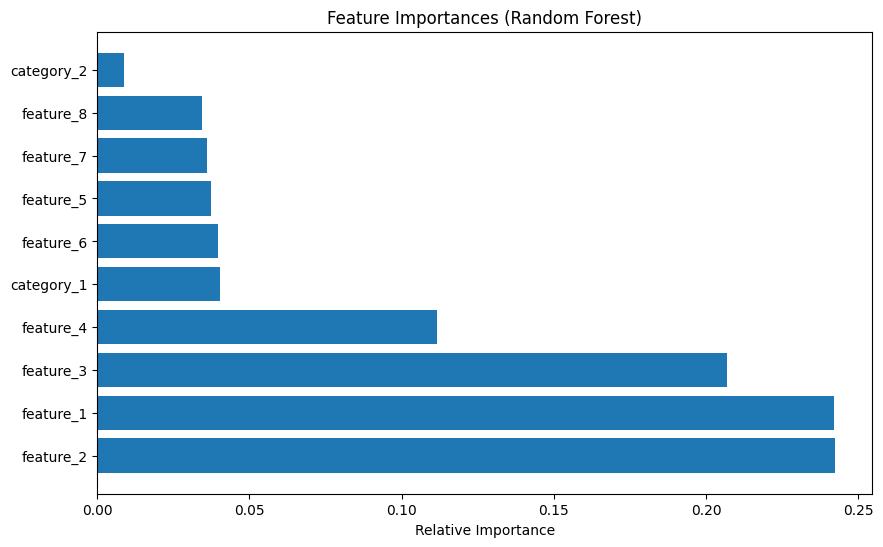

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Важность признаков для Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Отображаем важность признаков
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Relative Importance")
plt.show()


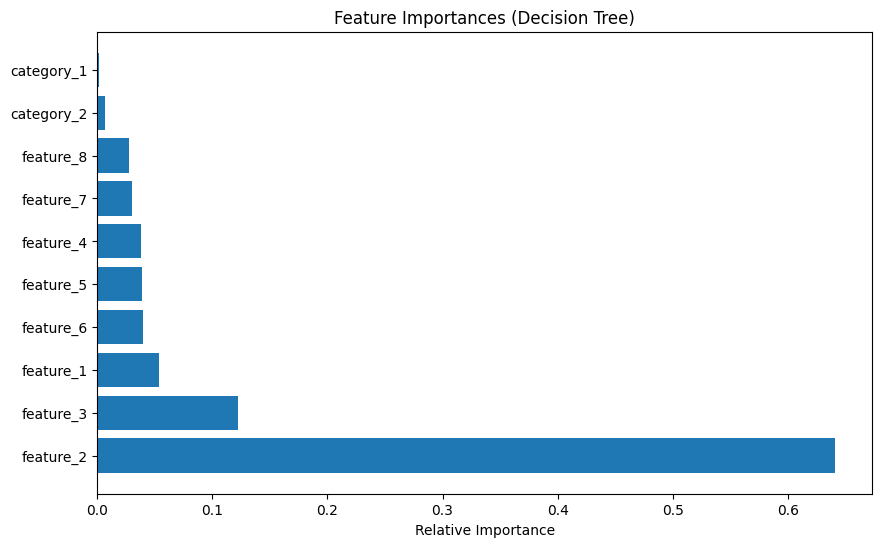

In [67]:
# Важность признаков для Decision Tree
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Отображаем важность признаков
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Decision Tree)")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Relative Importance")
plt.show()


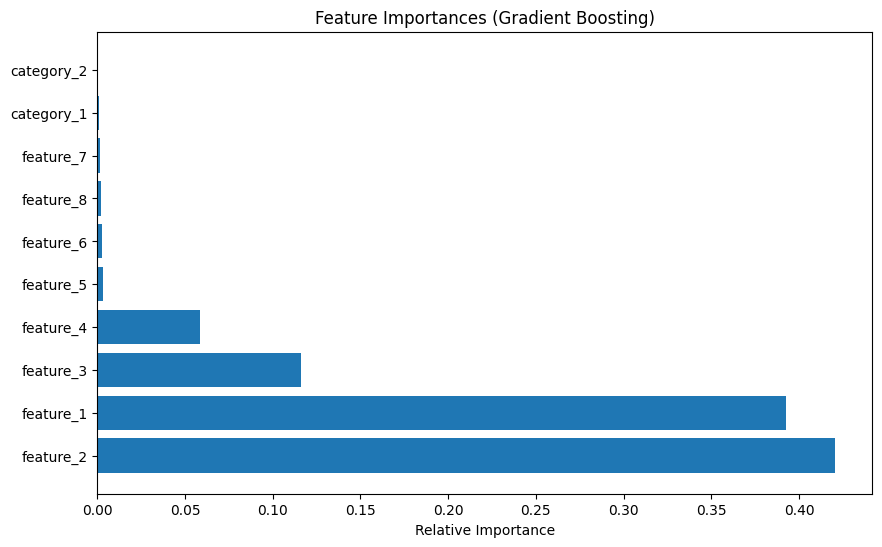

In [68]:
# Важность признаков для Gradient Boosting
importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Отображаем важность признаков
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Gradient Boosting)")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Relative Importance")
plt.show()


In [69]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [70]:
!pip install --upgrade shap

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.1/547.1 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: shap
    Found existing installation: shap 0.46.0
    Uninstalling shap-0.46.0:
      Successfully uninstalled shap-0.46.0

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [71]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

/Users/aruuketurgunbaeva/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [72]:
print("Shape of SHAP values:", np.array(shap_values).shape)
print("Shape of X_test:", X_test.shape)

Shape of SHAP values: (1800, 10, 2)
Shape of X_test: (1800, 10)


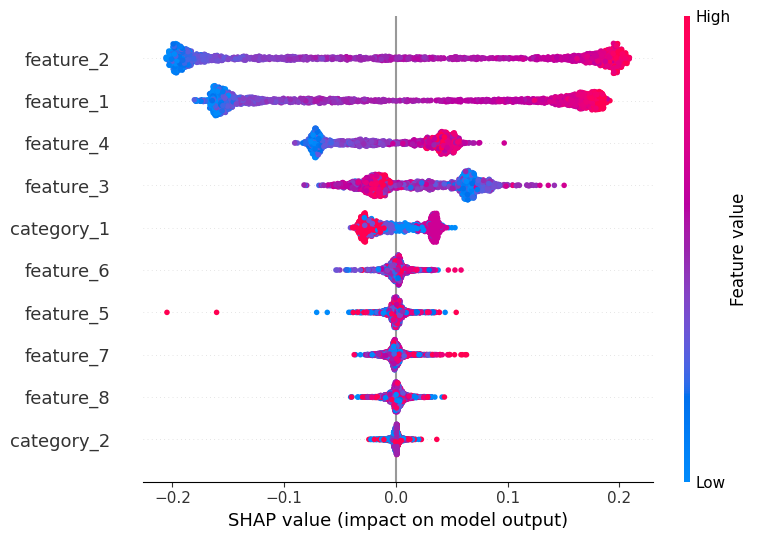

In [73]:
# Use SHAP values for the positive class (index 1)
shap_values_positive_class = shap_values[:, :, 1]

# Now plot the summary
shap.summary_plot(shap_values_positive_class, X_test)

In [74]:
# Force plot for the first prediction
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[0, :, 1], X_test.iloc[0])

Shape of SHAP values for positive class: (1800, 10)
Shape of X_test: (1800, 10)


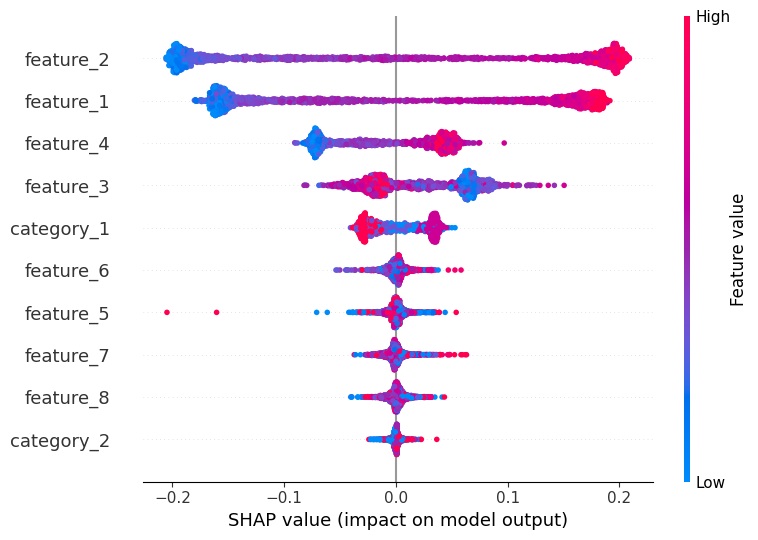

In [75]:
# Extract SHAP values for the positive class (class 1)
shap_values_positive = shap_values[:, :, 1]

# Check the shape to ensure compatibility
print("Shape of SHAP values for positive class:", shap_values_positive.shape)
print("Shape of X_test:", X_test.shape)

# Plot the summary for the positive class
shap.summary_plot(shap_values_positive, X_test)

In [76]:
# Force plot for the first prediction
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[0, :, 1], X_test.iloc[0])


SHAP analysis for Gradient Boosting:
Original SHAP Values Shape: (1800, 10)
X_test Shape: (1800, 10)
Fixed SHAP Values Shape: (1800, 10)


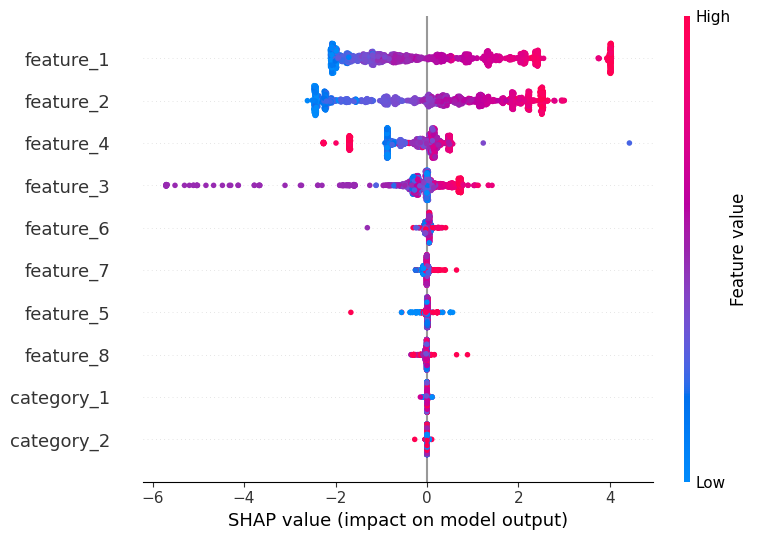


SHAP analysis for Random Forest:
Original SHAP Values Shape: (1800, 10, 2)
X_test Shape: (1800, 10)
Fixed SHAP Values Shape: (1800, 10)


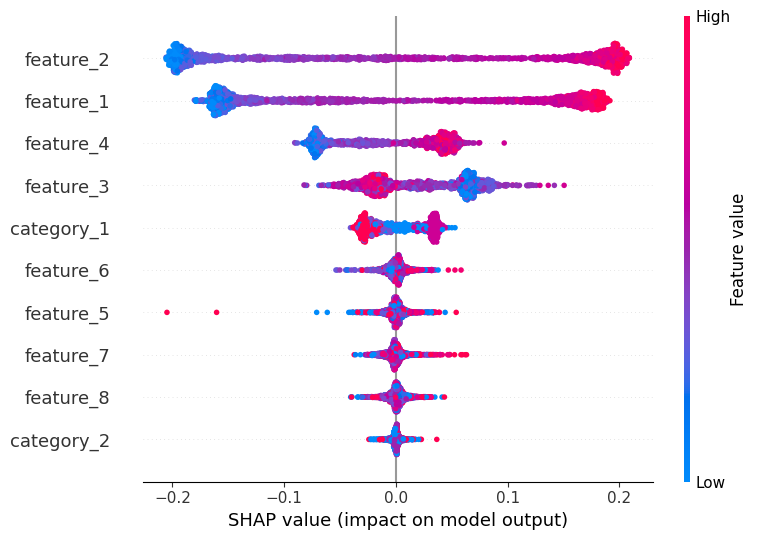


SHAP analysis for Decision Tree:
Original SHAP Values Shape: (1800, 10, 2)
X_test Shape: (1800, 10)
Fixed SHAP Values Shape: (1800, 10)


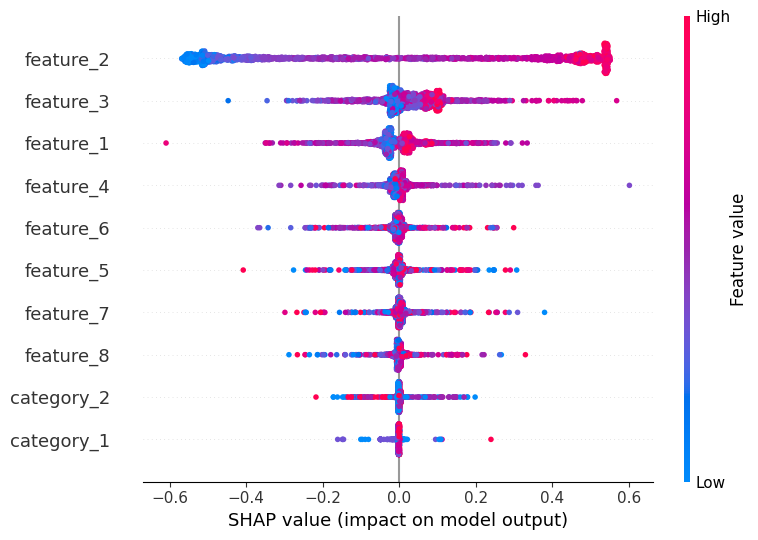

In [77]:
import shap
import numpy as np

# Initialize SHAP explainers for each model
models = {
    'Gradient Boosting': gb_model,
    'Random Forest': rf_model,
    'Decision Tree': dt_model
}

for model_name, model in models.items():
    print(f"\nSHAP analysis for {model_name}:")

    # Use TreeExplainer for tree-based models, otherwise use default SHAP Explainer
    if isinstance(model, (RandomForestClassifier, GradientBoostingClassifier, DecisionTreeClassifier)):
        explainer = shap.TreeExplainer(model)
    else:
        explainer = shap.Explainer(model)

    # Compute SHAP values
    shap_values = explainer.shap_values(X_test)

    # Debugging - Print original shape
    print("Original SHAP Values Shape:", np.array(shap_values).shape)
    print("X_test Shape:", X_test.shape)

    # ✅ Fix SHAP value extraction for binary classification
    if isinstance(shap_values, list) and len(shap_values) > 1:
        shap_values_positive_class = shap_values[1]  # Select positive class
        expected_value = explainer.expected_value[1]
    elif len(shap_values.shape) == 3:  # Handle 3D SHAP values (binary classification)
        shap_values_positive_class = shap_values[:, :, 1]  # Select class 1
        expected_value = explainer.expected_value[1]
    else:
        shap_values_positive_class = shap_values
        expected_value = explainer.expected_value  # Scalar for binary classification

    # Debugging - Print fixed shape
    print("Fixed SHAP Values Shape:", shap_values_positive_class.shape)

    # ✅ Ensure they now match
    assert shap_values_positive_class.shape == X_test.shape, "SHAP values still do not match X_test!"

    # Generate Summary Plot (Global Importance)
    shap.summary_plot(shap_values_positive_class, X_test)

    # Generate Force Plot (Single Instance Explanation)
    shap.initjs()  # Enable interactive visualization
    shap.plots.force(expected_value, shap_values_positive_class[0], X_test.iloc[0])

## Key elements of the graph:

### Prediction Probabilities:
- On the left are the probabilities of predicting two classes: 0 and 1.
- Here the model predicts class 0 with a probability of 1.00 (100%), and the probability of class 1 is 0.00.

### Feature Contributions:
- In the middle is how each feature contributed to the prediction.
- Feature values ​​are sorted by their contribution to the decision.
- Blue bars show features that contributed to the prediction of class 0.
- Orange bars are features that support class 1.
#### -Examples-:
- feature_3 > 0.62 (orange bar) contributes towards class 1, but not enough to change the decision.
- square_feature_2 <= 0.14 (blue bar) supports class 0.

### Feature Values:
- On the right are the specific feature values.

#### For example:
- feature_3 has a value of 0.72.
- square_feature_2 — 0.10.
### Interpretation in LIME:
- LIME evaluates the importance of each feature in the local context (specific prediction).
- Features with a longer band length have a greater influence on the prediction.

#### In this case:
- Features square_feature_2 and feature_2 contributed the most to the prediction of class 0.
- Features such as feature_3 and feature_4 were biased towards class 1, but were outweighed.